#Importing Necessary Libraries

In [ ]:
# Installing the xgboost and other libraries
!pip install xgboost
!pip install dask-ml
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompat

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
#imputation libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings

# Set the warning filter to ignore
warnings.filterwarnings('ignore')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 3 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import backend
# Library to split data
from sklearn.model_selection import train_test_split
# To tune different models
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import random
from tensorflow.keras import backend

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


#mount drive for data import
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Import


In [ ]:
#data is split by survey and travel data
s_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Surveydata_train.csv')
s_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Surveydata_test.csv')
t_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Traveldata_train.csv')
t_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Traveldata_test.csv')

#data dictionaries
t_data_dict = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hackathon/Data_Dictionary.xlsx',header=1)
s_data_dict = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hackathon/Data_Dictionary.xlsx',sheet_name=1, header=1, nrows=18)

#merging into single data frame
f_train = pd.merge(left=s_train,right=t_train,on='ID')
f_test = pd.merge(left=s_test,right=t_test,on='ID')

##Data Dictionaries


In [ ]:
pd.set_option('display.max_colwidth', None)
print('Travel Data Dictionary')
t_data_dict

Travel Data Dictionary


,Column Name,Column Description,Column Value Examples
0,ID,The unique ID of the passenger,"Continuous values like 98800001, 98800002, etc."
1,Gender,The gender of the passenger,Male\nFemale
2,Customer_Type,Loyalty type of the passenger,Loyal Customer\nDisloyal Customer
3,Age,The age of the passenger,"Continuous values like 48, 52, 9, etc."
4,Type_Travel,Purpose of travel for the passenger,Personal Travel\nBusiness Travel
5,Travel_Class,The train class that the passenger traveled in,Business\nEco
6,Travel_Distance,The distance traveled by the passenger,"Continuous values like 272, 780, 853, etc."
7,Departure_Delay_in_Mins,The delay (in minutes) in train departure,"Continuous values like 9, 15, 13, etc."
8,Arrival_Delay_in_Mins,The delay (in minutes) in train arrival,"Continuous values like 0, 15, 18, etc."


In [ ]:
print('Survey Data Dictionary')
s_data_dict

Survey Data Dictionary


,Column Name,Column Description,Column Value Examples
0,ID,The unique ID of the passenger,"Continuous values like 98800001, 98800002, etc."
1,Platform_Location,How convenient the location of the platform is for the passenger,Very Inconvenient\nInconvenient\nNeeds Improvement\nManageable\nConvenient\nVery Convenient
2,Seat_Class,"The type of the seat class in the train \nGreen Car seats are usually more spacious and comfortable than ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car.",Ordinary\nGreen Car
3,Overall_Experience,The overall experience of the passenger,1 - Satisfied\n0 - Not Satisfied
4,Seat_Comfort,The comfort level of the seat for the passenger,Extremely Poor\nPoor\nNeeds Improvement\nAcceptable\nGood\nExcellent
5,Arrival_Time_Convenient,How convenient the arrival time of the train is for the passenger,Extremely Poor\n Poor\nNeeds Improvement\nAcceptable\nGood\nExcellent
6,Catering,How convenient the catering service is for the passenger,Extremely Poor\n Poor\nNeeds Improvement\nAcceptable\nGood\nExcellent
7,Onboard_Wifi_Service,The quality of the onboard Wi-Fi service for the passenger,Extremely Poor\n Poor\nNeeds Improvement\nAcceptable\nGood\nExcellent
8,Onboard_Entertainment,The quality of the onboard entertainment for the passenger,Extremely Poor\n Poor\nNeeds Improvement\nAcceptable\nGood\nExcellent
9,Online_Support,The quality of the online support for the passenger,Extremely Poor\n Poor\nNeeds Improvement\nAcceptable\nGood\nExcellent


In [ ]:
#Preview Data and Ensuring proper data merge.
s_train.head()
print('Survey Data')
s_train.info()
s_test.head()

t_train.head()
print('\nTravel Data')
t_train.info()
t_test.head()

print('\nMerged Train Data')
f_train.info()

print('\nMerged Test Data')
f_test.info()
#adding overall experience to other training data.
t_train = pd.merge(t_train, s_train[['ID', 'Overall_Experience']], on='ID', how='left')

#Comparing data shapes for merge integrity. Test should be one less the sum('ID'), train should be 2 less('ID', 'Overall Experience')
print(t_test.shape)
print(s_test.shape)
print(f_test.shape)

print(t_train.shape)
print(s_train.shape)
print(f_train.shape)



Survey Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          9

#Data Wrangling

##Missing Values

In [ ]:
df = f_train.copy() #copy of original data

#Printing number of missing by variable.
print(f'Number Missing by variable:\n{df.isnull().sum()}\n')
print(f'Percent Missing by variable:\n{df.isnull().sum()/df.shape[0]}\n')

#printing a count of each unique value by column.
object_columns = df.columns[df.dtypes=='object']
print('--'*50)
print('Count of Unique Values In Variable\n')
for col in object_columns:
  ccount = df[col].value_counts(dropna=False)
  print(ccount)
  print()

#printing a percent of each unique value by column.
print('--'*50)
print('Percent of Unique Values In Variable\n')
for col in object_columns:
  ccount = df[col].value_counts(normalize=True,dropna=False)
  print(ccount)
  print()

Number Missing by variable:
ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

Percent Missing by variable:
ID                        0.00000
Overall_Experience        0.00000
Seat_Comfort              0.00065
Seat_Class                0

### Converting Ranked Data

In [ ]:
#mapping survery results to numerical values

# Define mapping of categories to numerical ratings
rating_mapping = {
    'Extremely Poor': 1,
    'Poor': 2,
    'Needs Improvement': 3,
    'Acceptable': 4,
    'Good': 5,
    'Excellent': 6
}

# Replace categorical values with numerical ratings
exclude_cols = ['ID', 'Overall_Experience', 'Seat_Class', 'Platform_Location']

# Select all columns except the excluded ones
rating_cols = [col for col in s_train.columns if col not in exclude_cols]

for col in rating_cols:
  f_train[col] = f_train[col].replace(rating_mapping)

# Define mapping of categories to numerical ratings
rating_mapping2 = {
    'Very Inconvenient': 1,
    'Inconvenient': 2,
    'Needs Improvement': 3,
    'Manageable': 4,
    'Convenient': 5,
    'Very Convenient': 6
}

f_train['Platform_Location'] = f_train['Platform_Location'].replace(rating_mapping2)

#applying to test data
for col in rating_cols:
  f_test[col] = f_test[col].replace(rating_mapping)

f_test['Platform_Location'] = f_test['Platform_Location'].replace(rating_mapping2)

f_train.describe().T
f_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.00000,99917801.50000,10277.55648,99900001.00000,99908901.25000,99917801.50000,99926701.75000,99935602.00000
Seat_Comfort,35580.00000,3.83665,1.39348,1.00000,3.00000,4.00000,5.00000,6.00000
Arrival_Time_Convenient,32277.00000,3.98727,1.52368,1.00000,3.00000,4.00000,5.00000,6.00000
Catering,32245.00000,3.85030,1.44208,1.00000,3.00000,4.00000,5.00000,6.00000
Platform_Location,35590.00000,3.98958,1.30121,2.00000,3.00000,4.00000,5.00000,6.00000
Onboard_Wifi_Service,35590.00000,4.25159,1.31707,1.00000,3.00000,4.00000,5.00000,6.00000
Onboard_Entertainment,35594.00000,4.38580,1.34510,1.00000,3.00000,5.00000,5.00000,6.00000
Online_Support,35576.00000,4.52080,1.30215,2.00000,4.00000,5.00000,6.00000,6.00000
Ease_of_Online_Booking,35584.00000,4.47653,1.30558,1.00000,3.00000,5.00000,6.00000,6.00000
Onboard_Service,32730.00000,4.45509,1.27542,2.00000,4.00000,5.00000,5.00000,6.00000


###Missing Data Imputing

In [ ]:
# Columns to Impute
exclude = ["Overall_Experience","ID"]
in_col = [col for col in f_train.columns if col not in exclude]  # excluding ID columns from visuals
numerical_cols = f_train[in_col].select_dtypes(include=['int64', 'float64']).columns  # listing numerical colum

# Perform multiple imputation
imputer = IterativeImputer()
f_train[numerical_cols] = round(pd.DataFrame(imputer.fit_transform(f_train[numerical_cols]), columns=numerical_cols))

#Inputing 'Unknown' for remaining missing
f_train.fillna('Unknown', inplace=True)
f_train.isna().sum()

# Perform multiple imputation
imputer = IterativeImputer()
f_test[numerical_cols] = round(pd.DataFrame(imputer.fit_transform(f_test[numerical_cols]), columns=numerical_cols))

#Inputing 'Unknown' for remaining missing
f_test.fillna('Unknown', inplace=True)
f_test.isna().sum()

ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

#Explortatory Data Analysis

##Univaiate Analysis

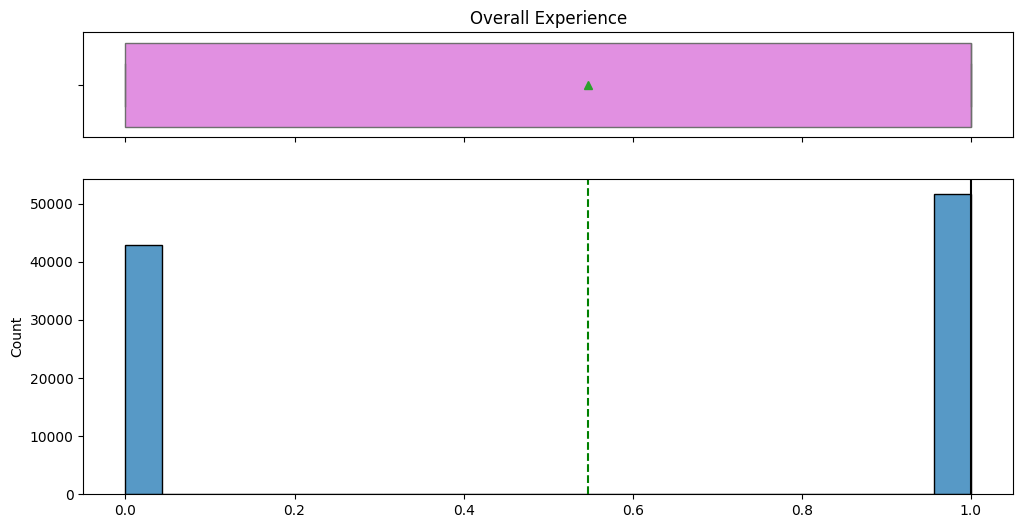

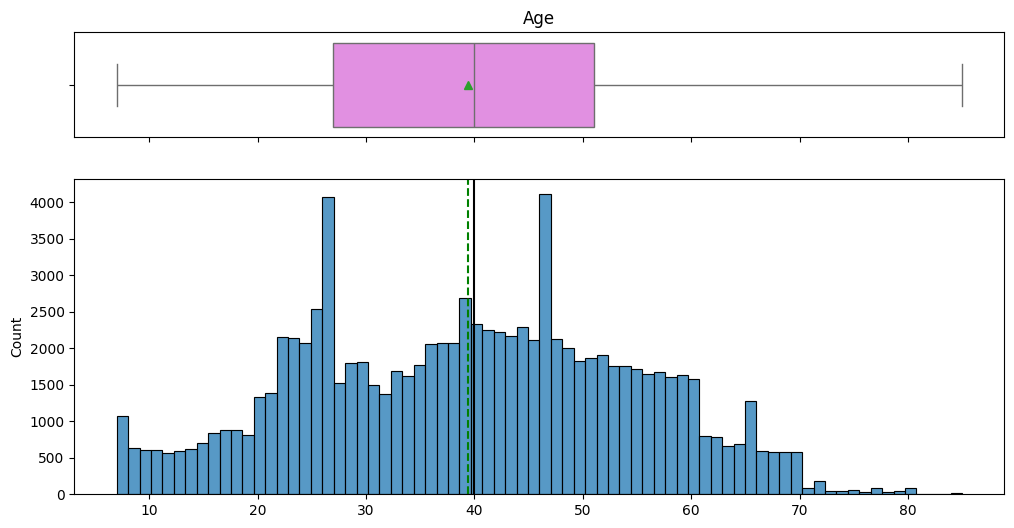

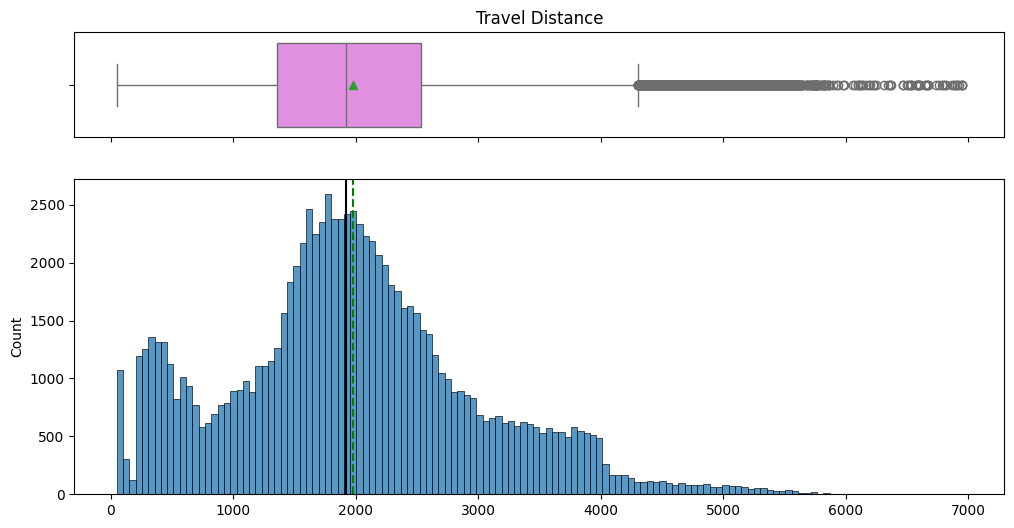

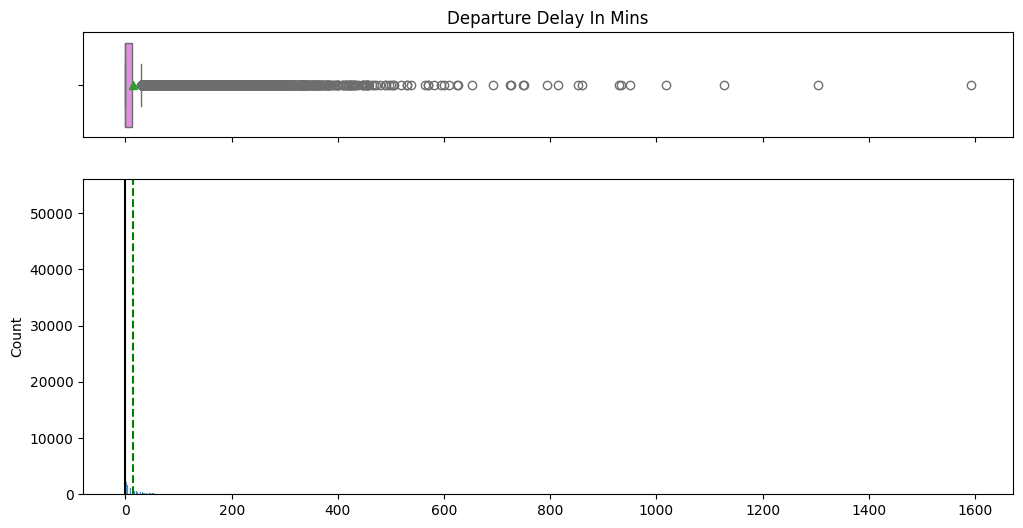

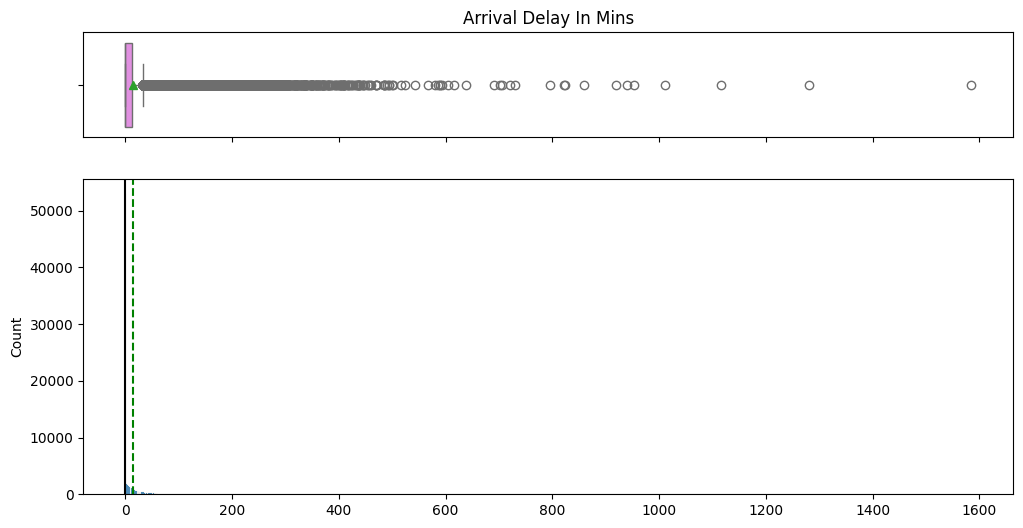

In [ ]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 6), kde=False, bins=None, palette =None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,


    )  # Creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette=palette
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, palette=palette
        )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Capitalize each word and join with space for x-axis label
    title = ' '.join([word.capitalize() for word in feature.split('_')])
    ax_box2.set_title(title)
    ax_hist2.set_xlabel("")
    plt.show()


# Univariate Exploration
# Using Original data for visual quality.
exclude = ["ID"]
in_col = [col for col in df.columns if col not in exclude]  # excluding ID columns from visuals
palette = sns.color_palette("deep")  # setting palette for colorblindness
numerical_cols = df[in_col].select_dtypes(include=['int64', 'float64']).columns  # listing numerical columns


for col in numerical_cols:
    histogram_boxplot(df, col, palette=palette)
    print()


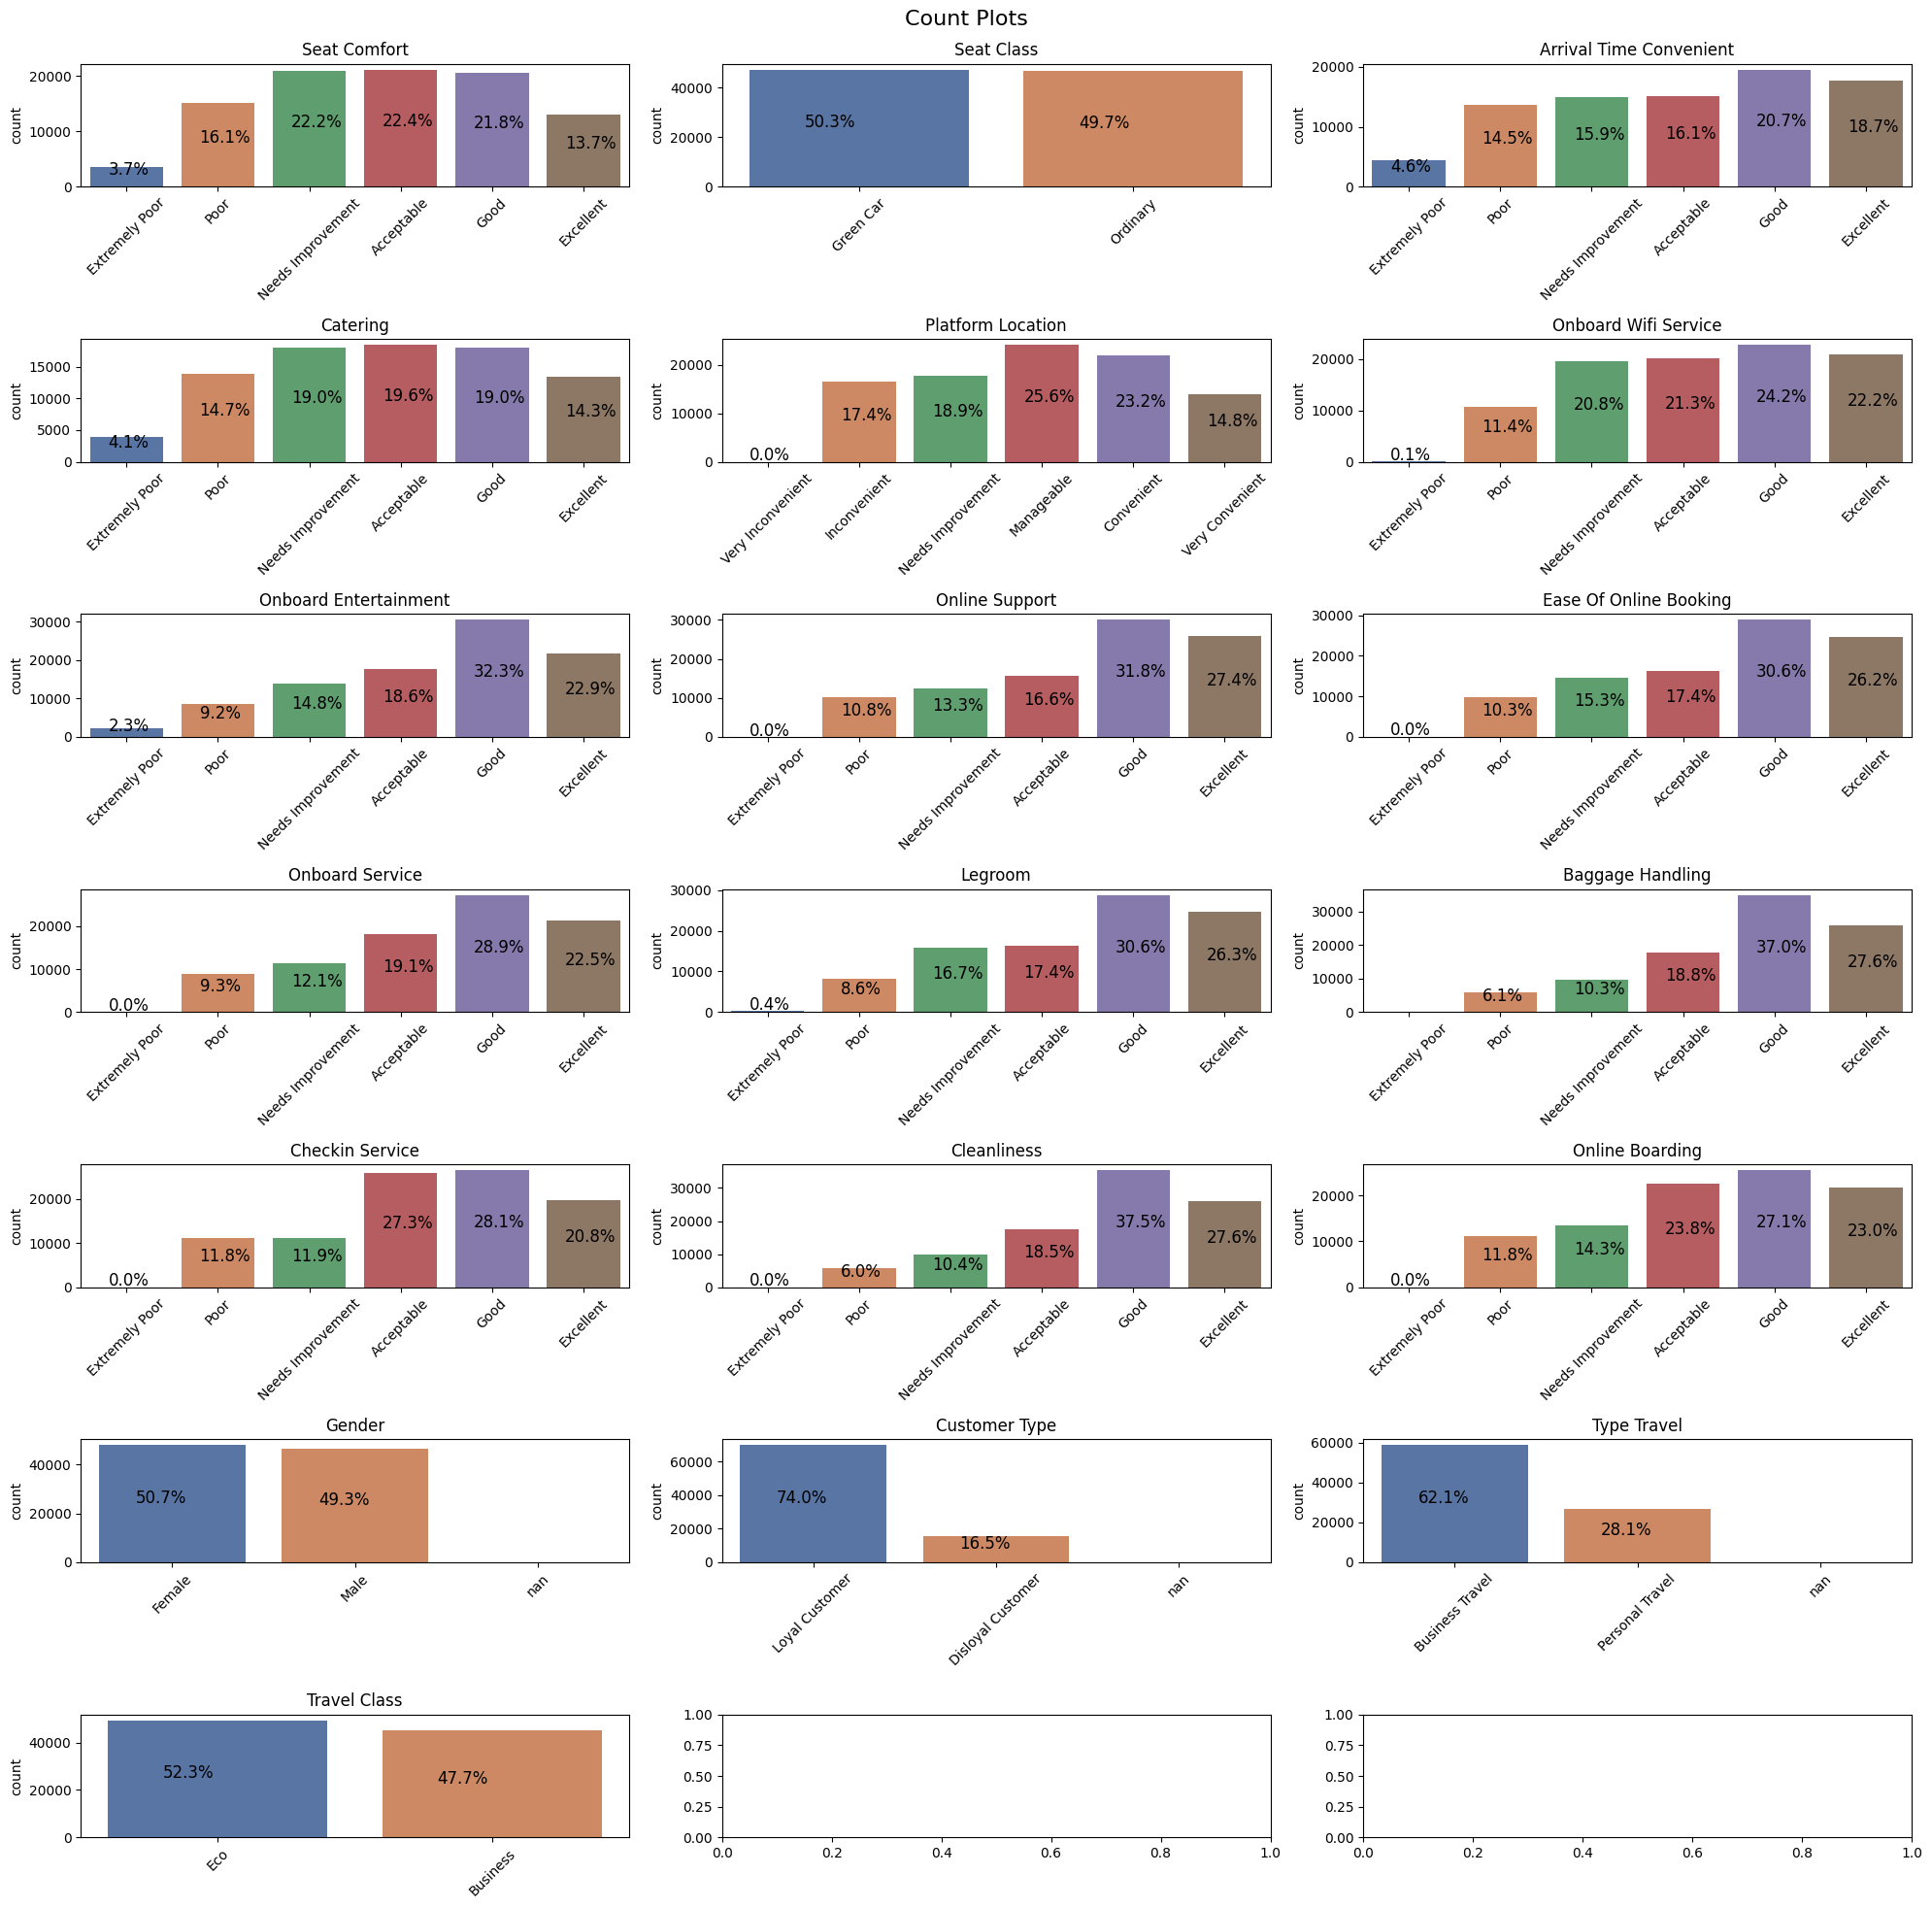

In [ ]:
# Countplots for Categorical Variables (Using Original Data)
categorical_cols = df[in_col].select_dtypes(include=['object']).columns
# Ensure that the number of columns is an integer
num_columns = 3
num_rows = len(categorical_cols) // num_columns+1  # Use integer division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))  # Create subplots

fig.suptitle('Count Plots\n', fontsize=16)  # Set the main title for the entire figure

for i, col in enumerate(categorical_cols):
    row_index = i // num_columns
    col_index = i % num_columns
    if col =='Platform_Location':
      order= ['Very Inconvenient', 'Inconvenient', 'Needs Improvement','Manageable','Convenient','Very Convenient']
    elif col in rating_cols:
      order = ['Extremely Poor','Poor', 'Needs Improvement','Acceptable','Good','Excellent']
    else:
      order = df[col].value_counts(dropna=False).index
    ax = sns.countplot(x=df[col], order=order, ax=axes[row_index, col_index], palette=palette)
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')
    label = ' '.join([word.capitalize() for word in col.split('_')])
    axes[row_index, col_index].set_title(label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Add percentage labels
    total = len(df[col])  # Total number of observations
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class
        x = p.get_x() + .2   # x-coordinate of the label
        y = p.get_y() + p.get_height()/2+325  # y-coordinate of the label
        ax.annotate(percentage, (x, y), size=12, color='black')  # Annotate the percentage

plt.tight_layout()
plt.show()


##Multivariate Analysis

In [ ]:
exclude = ["ID", 'Overall_Experience']
in_col = [col for col in f_train.columns if col not in exclude]  # Excluding ID columns from visuals
numerical_cols = f_train[in_col].select_dtypes(include=['int64', 'float64']).columns  # Listing numerical columns

# Iterate over numerical columns and create scatter plots one after the other
for col in numerical_cols:
    plt.figure(figsize=(10, 8))  # Set figure size for each plot
    sns.histplot(data=f_train, x=col, hue='Overall_Experience', alpha=0.2)
    plt.title(f'Histogram of {col} vs Overall_Experience')
    plt.tight_layout()  # Adjust layout
    plt.show()

<Axes: xlabel='Arrival_Delay_in_Mins', ylabel='Count'>

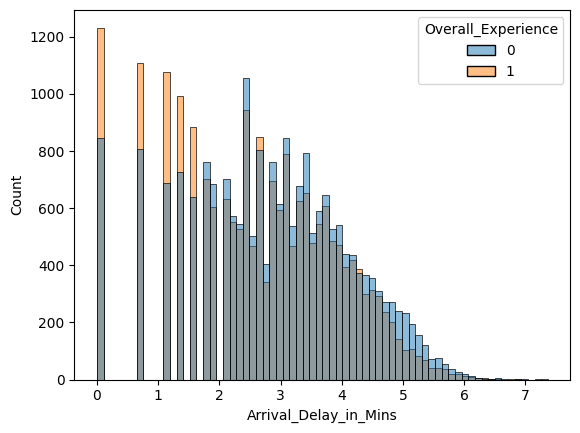

In [ ]:
sns.histplot(f_train, x=np.log(f_train['Arrival_Delay_in_Mins']), hue='Overall_Experience')

<Axes: xlabel='Departure_Delay_in_Mins', ylabel='Count'>

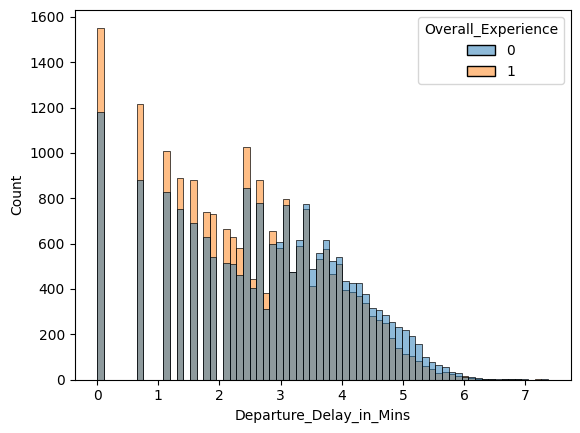

In [ ]:
sns.histplot(f_train, x=np.log(f_train['Departure_Delay_in_Mins']), hue='Overall_Experience')

<Axes: xlabel='Travel_Distance', ylabel='Count'>

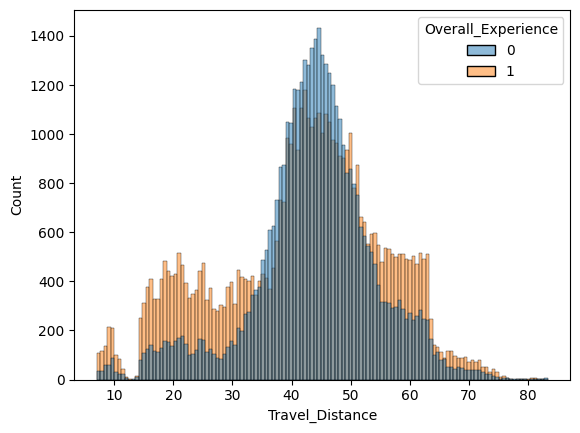

In [ ]:
sns.histplot(f_train, x=np.sqrt(f_train['Travel_Distance']), hue='Overall_Experience')

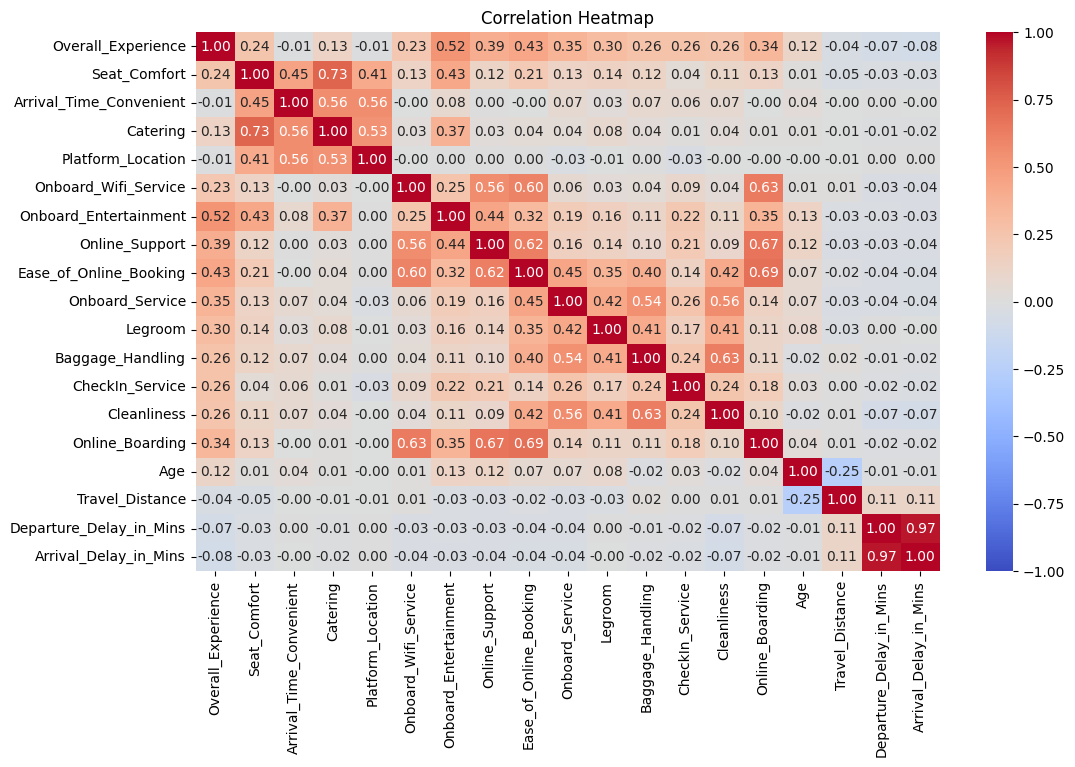

In [ ]:
# Select columns that are numerical and exclude 'ID'
cols = f_train.select_dtypes(include=['int64', 'float64']).columns
cols = [col for col in cols if col != 'ID']  # Exclude 'ID'

# Plot the correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(f_train[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

f_train.drop(columns = 'Departure_Delay_in_Mins', inplace=True) # Removing due to extremely high correlation
f_test.drop(columns = 'Departure_Delay_in_Mins', inplace=True)  # Nearly Identical to Arrival Delay

# f_train['Arrival_Delay_in_Mins']= np.log(f_train['Arrival_Delay_in_Mins']+1) #scaling arrival delay
# f_train['Travel_Distance'] = np.sqrt(f_train['Travel_Distance'])
# f_test['Arrival_Delay_in_Mins']= np.log(f_test['Arrival_Delay_in_Mins']+1) #scaling arrival delay
# f_test['Travel_Distance'] = np.sqrt(f_test['Travel_Distance'])

# cols = f_train.select_dtypes(include=['int64', 'float64']).columns
# cols = [col for col in cols if col != 'ID']  # Exclude 'ID'
# # Plot the correlation heatmap
# plt.figure(figsize=(12, 7))
# sns.heatmap(f_train[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

##VIF

In [ ]:
#checking variance inflation
X = f_train.drop(['Overall_Experience','ID' ], axis=1)
y = f_train['Overall_Experience']

X_numeric = X.select_dtypes(include=[np.number])

# Handle missing values by filling with the mean of the column
X_numeric = X_numeric.fillna(X_numeric.mean())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif_data)

#Consider PCA

                    feature      VIF
0              Seat_Comfort 21.15481
1   Arrival_Time_Convenient 14.45829
2                  Catering 24.46036
3         Platform_Location 16.61070
4      Onboard_Wifi_Service 21.68386
5     Onboard_Entertainment 20.74760
6            Online_Support 29.98159
7    Ease_of_Online_Booking 45.59155
8           Onboard_Service 25.50858
9                   Legroom 17.66237
10         Baggage_Handling 32.87818
11          CheckIn_Service 15.25000
12              Cleanliness 34.63489
13          Online_Boarding 32.58431
14                      Age  7.63189
15          Travel_Distance  4.63360
16    Arrival_Delay_in_Mins  1.17510


#### Obs
Highly correlated variables in survey data. Explore dropping columns, PCA, or algorithms good for correlated variables.

In [ ]:
# Define the stacked_barplot function
def stacked_barplot(data, var, res, figsize=(10, 6), order=None, palette=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()

    # Filter order to include only existing values in var
    if order is not None:
        order = [val for val in order if val in data[var].unique()]

    # Calculate percentage and plot stacked bar plot
    ct = pd.crosstab(data[var], data[res], normalize='index')
    if order:
        ct = ct.loc[order]  # Filter rows based on order

    (ct * 100).plot(kind='bar', stacked=True, color=palette, ax=ax)

    ax.legend(loc="lower right")
    ax.set_ylabel(res)
    ax.set_title(var)

    return ax

In [ ]:
# Define the number of rows and columns for subplots
num_cols = 3
num_rows = (len(categorical_cols) + 2) // num_cols


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Loop over categorical columns and plot stacked barplots
for i, col in enumerate(categorical_cols):
  ax = axes[i]  # Get the current axis
  if col =='Platform_Location':
    order= ['Very Inconvenient', 'Inconvenient', 'Needs Improvement','Manageable','Convenient','Very Convenient']
  elif col in rating_cols:
    order = ['Extremely Poor','Poor', 'Needs Improvement','Acceptable','Good','Excellent']
  else:
    order = df[col].value_counts(dropna=False).index
  stacked_barplot(df, col, 'Overall_Experience', order=order, figsize=(8, 4), palette=palette, ax=ax)  # Plot the stacked barplot
  ax.set_title(col)  # Set the title for the subplot
  ax.set_xlabel('')
  ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any extra empty subplots
for i in range(len(categorical_cols), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# potential drops: Seat Class, Arrival time convenient, platform_location

NameError: name 'categorical_cols' is not defined

###Drop columns


In [ ]:
#Drop Columns: Seat Class
f_train.drop(columns=['Seat_Class'], inplace = True)
f_test.drop(columns=['Seat_Class'], inplace = True)

# Feature Engineering/Selection


In [ ]:
# no information gained. Remove or explore average rating with less complex models.

# #add column of total missing
# f_train['total_missing'] = df.isnull().sum(axis=1)
# #counts # of ratings below threshold per
# cols = rating_cols+['Platform_Location']
# f_train['Average_Rating']= f_train[cols].mean(axis=1)
# sns.histplot(f_train, x='Average_Rating',  hue='Overall_Experience')
# plt.show()
# print(f_train['total_missing'].value_counts())
# stacked_barplot(f_train, 'total_missing', 'Overall_Experience')
# plt.show()
# #drop total_missing
# f_train.drop(columns=['total_missing', 'Average_Rating'], inplace=True)

##PCA

In [ ]:
## utilizing PC's negatively impacted model performances and was thus abandoned.

# # Selecting only object columns for dummy variables
# cols = f_train.columns[f_train.dtypes == 'object']

# # Preparing Data
# X = f_train.drop(['Overall_Experience', 'ID'], axis=1)
# X = pd.get_dummies(X, columns=cols, drop_first=True)

# # Standardize the numerical columns
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# # Apply PCA
# pca = PCA()
# X_pca = pca.fit_transform(X)

# # Optional: Explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance_ratio)

# # Optional: Cumulative explained variance
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# print("Cumulative explained variance:", cumulative_variance_ratio)

# # Determine number of components to retain 95% variance
# percent = 0.95
# n_components = np.argmax(cumulative_variance_ratio >= percent) + 1  # Add 1 because index starts from 0

# print(f'Number of components to retain {percent*100}% variance: {n_components}')

# # Transform X with the selected number of components
# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)

# # Check the shape of X_pca
# print("Shape of X_pca:", X_pca.shape)


#Decision Tree .93


In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted,digits=5))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.5f', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Splitting the data into train and test sets
cols = f_train.columns[f_train.dtypes == 'object']
X = f_train.drop(['Overall_Experience', 'ID'], axis=1)
X = pd.get_dummies(X, columns=cols, drop_first=True)
# X = X_pca #using pca to fit (decreased performance)
Y = f_train.Overall_Experience
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
#applying to test data
testset = f_test.copy()
testset = pd.get_dummies(testset, columns=cols, drop_first=True)
testset.set_index('ID', inplace=True)

# Display the first few rows of the testset to verify
testset.head()

Shape of Training set :  (84941, 25)
Shape of test set :  (9438, 25)
Percentage of classes in training set:
Overall_Experience
1   0.54644
0   0.45356
Name: proportion, dtype: float64
Percentage of classes in test set:
Overall_Experience
1   0.54863
0   0.45137
Name: proportion, dtype: float64


,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Gender_Unknown,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco
ID,,,,,,,,,,,,,,,,,,,,,,,,,
99900001,4.00000,4.00000,4.00000,4.00000,3.00000,6.00000,5.00000,6.00000,6.00000,6.00000,6.00000,5.00000,6.00000,2.00000,36.00000,532.00000,0.00000,0.00000,False,False,False,True,False,False,False
99900002,1.00000,5.00000,2.00000,4.00000,4.00000,2.00000,4.00000,4.00000,6.00000,4.00000,5.00000,4.00000,6.00000,4.00000,21.00000,1425.00000,9.00000,28.00000,False,False,False,False,False,False,False
99900003,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,3.00000,3.00000,3.00000,3.00000,5.00000,3.00000,6.00000,60.00000,2832.00000,0.00000,0.00000,True,False,True,False,False,False,False
99900004,4.00000,6.00000,4.00000,6.00000,2.00000,4.00000,6.00000,2.00000,4.00000,3.00000,6.00000,6.00000,6.00000,2.00000,29.00000,1352.00000,0.00000,0.00000,False,False,True,False,True,False,True
99900005,6.00000,1.00000,6.00000,3.00000,6.00000,6.00000,6.00000,6.00000,5.00000,4.00000,6.00000,6.00000,6.00000,6.00000,18.00000,1610.00000,17.00000,0.00000,True,False,False,False,False,False,False


In [ ]:
# fitting simple decision tree
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     38526
           1    1.00000   1.00000   1.00000     46415

    accuracy                        1.00000     84941
   macro avg    1.00000   1.00000   1.00000     84941
weighted avg    1.00000   1.00000   1.00000     84941



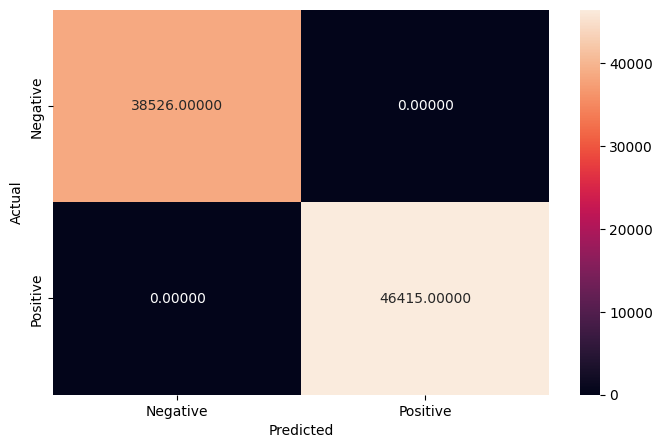

              precision    recall  f1-score   support

           0    0.92958   0.92958   0.92958      4260
           1    0.94206   0.94206   0.94206      5178

    accuracy                        0.93643      9438
   macro avg    0.93582   0.93582   0.93582      9438
weighted avg    0.93643   0.93643   0.93643      9438



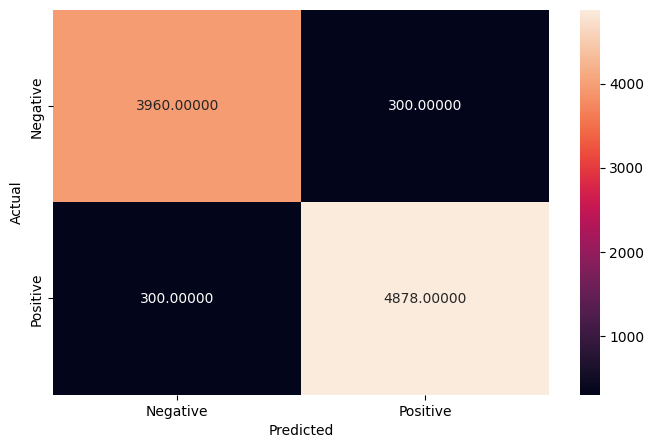

In [ ]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)
# strong perfomer without tuning, explore further

##Decision Tree Tuning .94

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight = {0: .45, 1: 0.55}) #applying uneven weight of response

# Grid of parameters to choose from
parameters = {
    'criterion': ['entropy'],
    'max_depth': [20, 30],
    'min_samples_split': [30],
    'min_samples_leaf': [1, 5, 10]
}

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=10, scoring='f1',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.45, 1: 0.55}, criterion='entropy',
                       max_depth=20, min_samples_split=30, random_state=1)

              precision    recall  f1-score   support

           0    0.95780   0.95972   0.95876     38526
           1    0.96651   0.96490   0.96570     46415

    accuracy                        0.96255     84941
   macro avg    0.96215   0.96231   0.96223     84941
weighted avg    0.96256   0.96255   0.96255     84941



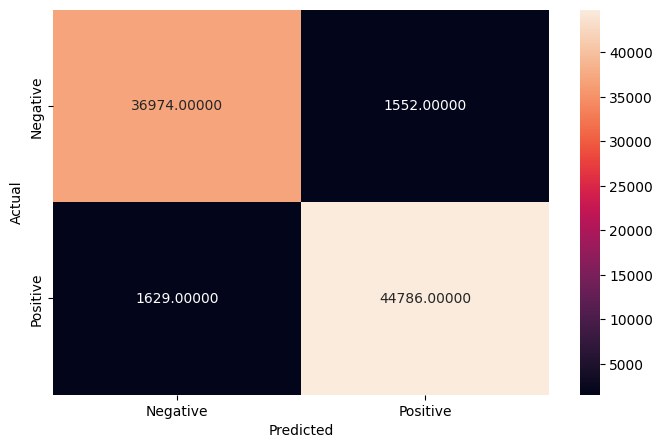

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0    0.93956   0.92216   0.93078      4265
           1    0.93679   0.95109   0.94388      5173

    accuracy                        0.93802      9438
   macro avg    0.93817   0.93662   0.93733      9438
weighted avg    0.93804   0.93802   0.93796      9438



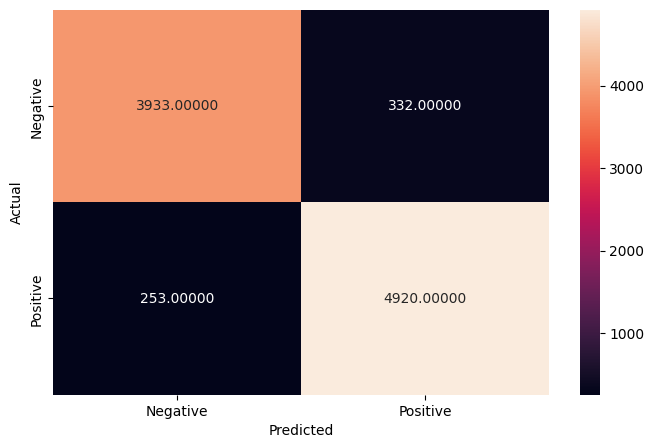

In [ ]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)
# overfitting. Use random forest to correct.

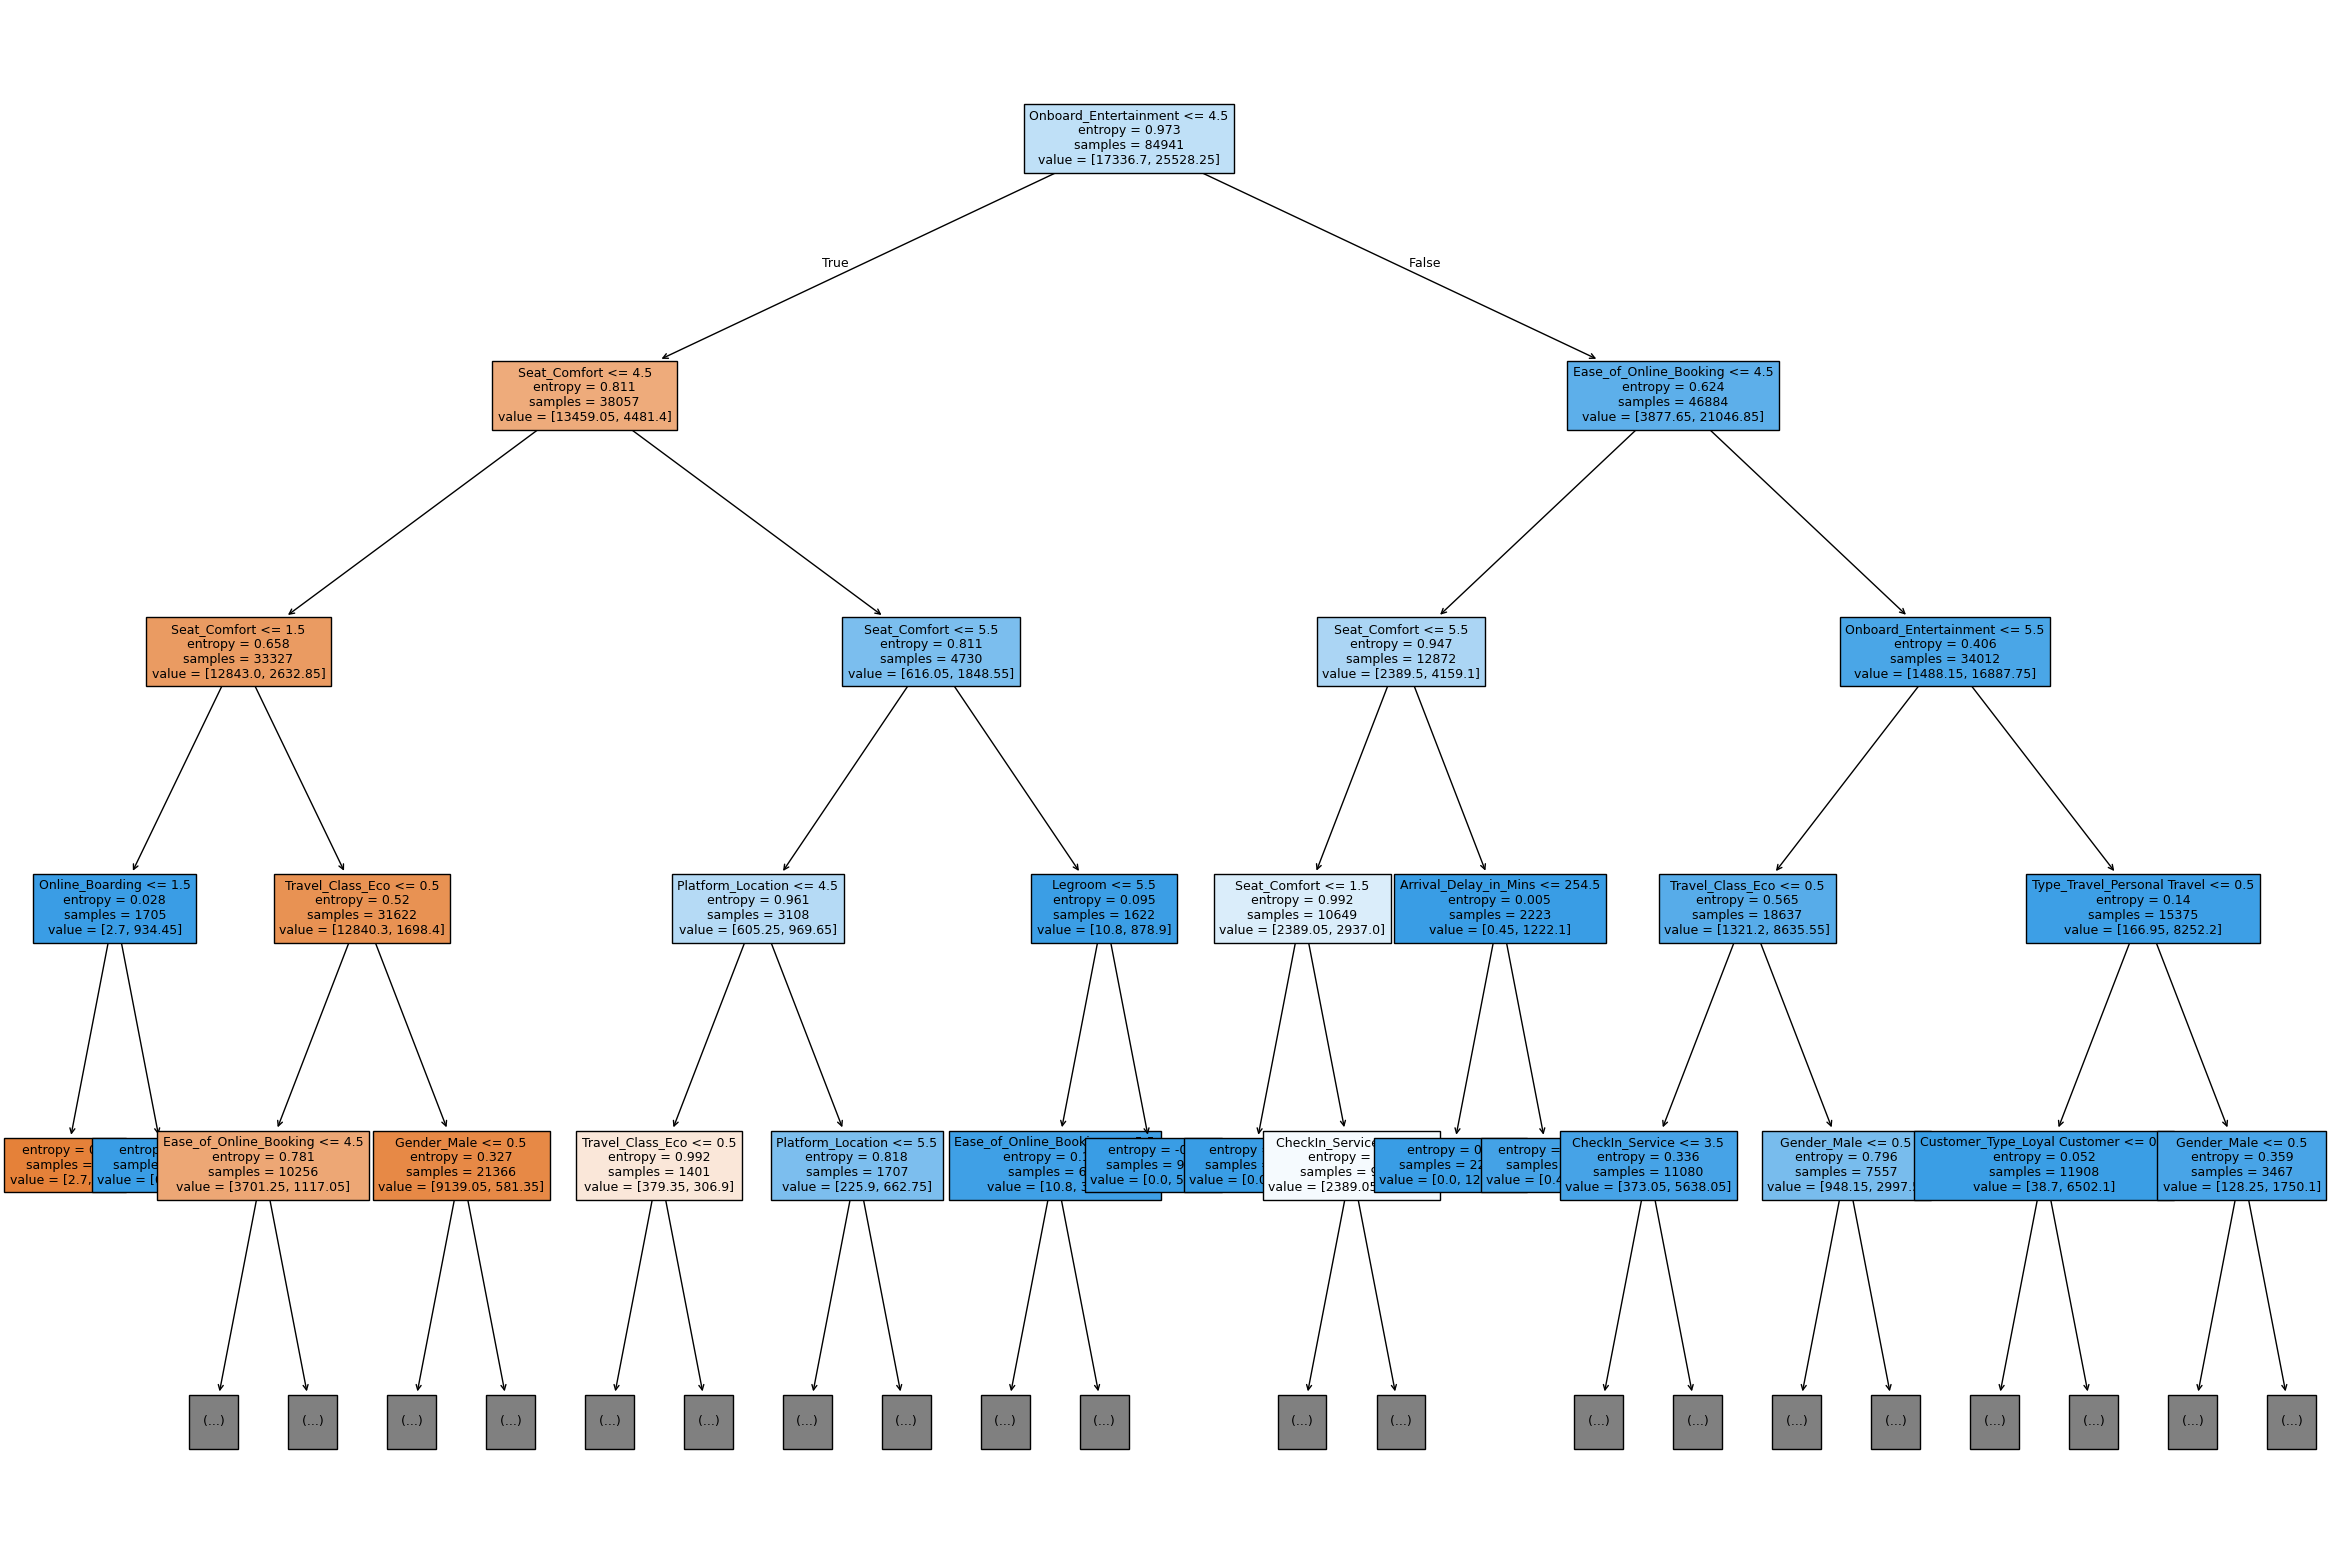

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

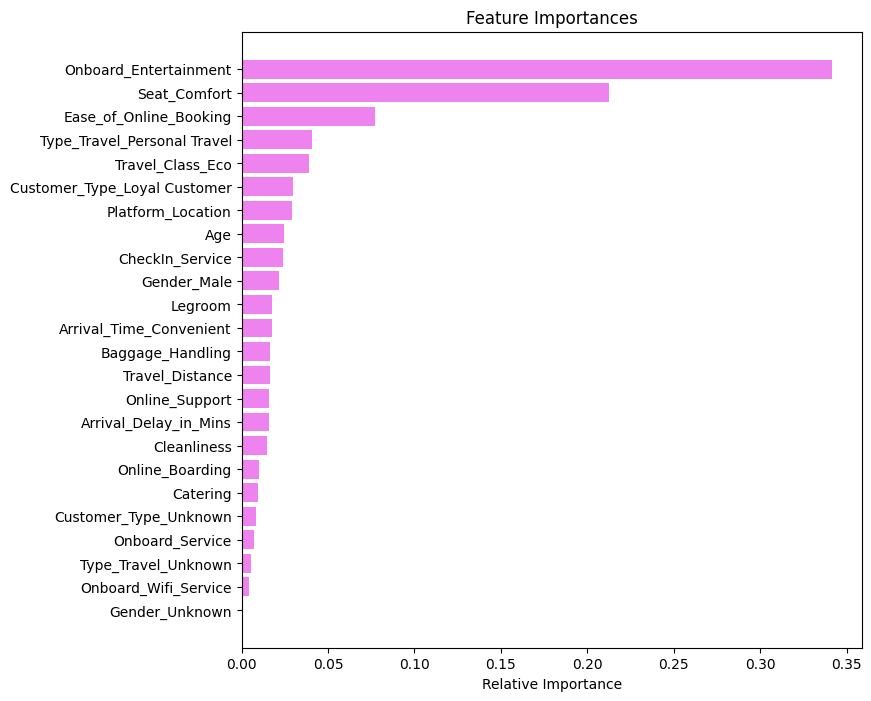

In [ ]:
# Get feature importances
importances = estimator.feature_importances_
features = X_train.columns  # Make sure this corresponds to your training data's column names

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##Drop Columns

In [ ]:
# Columns that should be explored as drop candidates
X_train.drop(columns=['Customer_Type_Unknown','Type_Travel_Unknown'], inplace = True)
X_test.drop(columns=['Customer_Type_Unknown','Type_Travel_Unknown'], inplace = True)
testset.drop(columns=['Customer_Type_Unknown','Type_Travel_Unknown'], inplace = True)
X_train.drop(columns=['Gender_Unknown'], inplace = True)
X_test.drop(columns=['Gender_Unknown'], inplace = True)
testset.drop(columns=['Gender_Unknown'], inplace = True)

#Random Forest .95

In [ ]:
rf_estimator = RandomForestClassifier(criterion='entropy', class_weight = {0: 0.45, 1: 0.55},random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.45, 1: 0.55}, criterion='entropy',
                       random_state=1)

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     38526
           1    1.00000   1.00000   1.00000     46415

    accuracy                        1.00000     84941
   macro avg    1.00000   1.00000   1.00000     84941
weighted avg    1.00000   1.00000   1.00000     84941



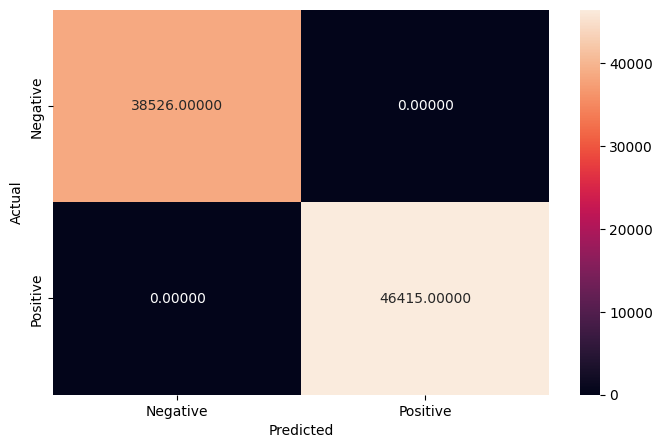

              precision    recall  f1-score   support

           0    0.93690   0.95845   0.94755      4260
           1    0.96516   0.94689   0.95594      5178

    accuracy                        0.95211      9438
   macro avg    0.95103   0.95267   0.95174      9438
weighted avg    0.95240   0.95211   0.95215      9438



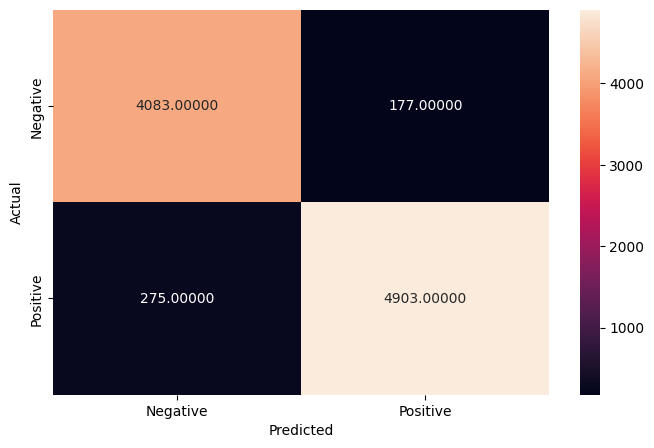

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)
#performance increased. tune

In [ ]:
#fitting to test set
rf_preds = rf_estimator.predict(testset)

rf_preds_df = pd.DataFrame(rf_preds, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
rf_preds_df.reset_index(inplace=True)

# Rename the 'index' column to 'ID'
rf_preds_df.rename(columns={'index': 'ID'}, inplace=True)

# Display the first few rows of rf_preds_df to verify
print(rf_preds_df.head())

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/rf_preds_untuned.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
rf_preds_df.to_csv(file_path, index=False, header=True)

##Random Forest Tuning .95

In [ ]:
# Choose the type of classifier.
estimator = RandomForestClassifier(criterion='entropy', class_weight = {0: .45, 1: 0.55}, random_state=42)

# Define the parameter grid
parameters = {
    'n_estimators': [140],
    'max_depth': [30],
    'bootstrap': [True]
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5, scoring='f1', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.45, 1: 0.55}, criterion='entropy',
                       max_depth=30, n_estimators=140, random_state=42)

              precision    recall  f1-score   support

           0    0.99995   0.99997   0.99996     38526
           1    0.99998   0.99996   0.99997     46415

    accuracy                        0.99996     84941
   macro avg    0.99996   0.99997   0.99996     84941
weighted avg    0.99996   0.99996   0.99996     84941



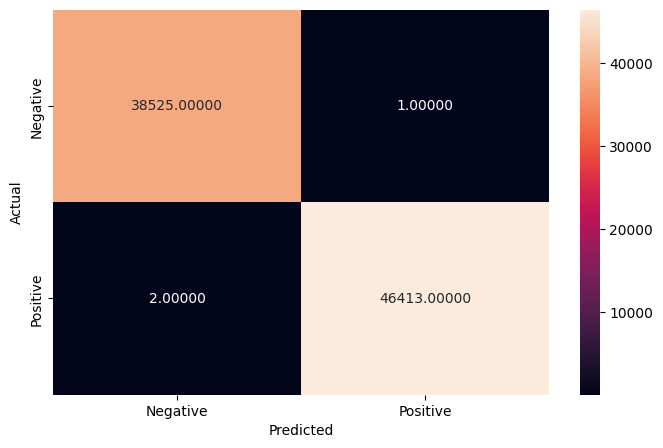

              precision    recall  f1-score   support

           0    0.93829   0.95305   0.94562      4260
           1    0.96087   0.94844   0.95461      5178

    accuracy                        0.95052      9438
   macro avg    0.94958   0.95074   0.95011      9438
weighted avg    0.95068   0.95052   0.95055      9438



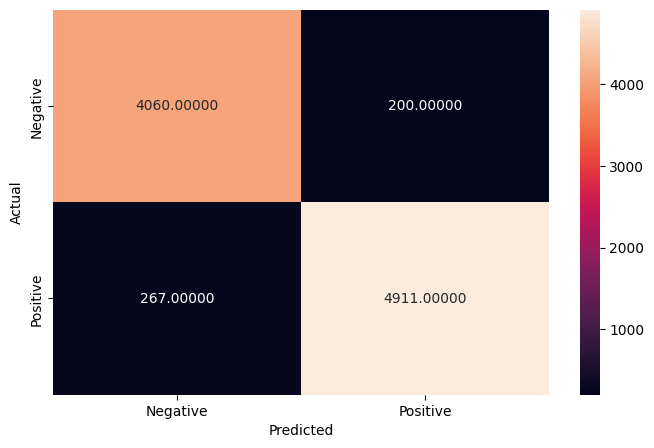

In [ ]:
y_pred_train_rf = estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

y_pred_test_rf = estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)
# still overfits explore boosting

In [ ]:
#fitting to test set
rf_preds = estimator.predict(testset)

rf_preds_df = pd.DataFrame(rf_preds, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
rf_preds_df.reset_index(inplace=True)

# Rename the 'index' column to 'ID'
rf_preds_df.rename(columns={'index': 'ID'}, inplace=True)

# Display the first few rows of rf_preds_df to verify
print(rf_preds_df.head())

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/rf_preds2.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
rf_preds_df.to_csv(file_path, index=False, header=True)

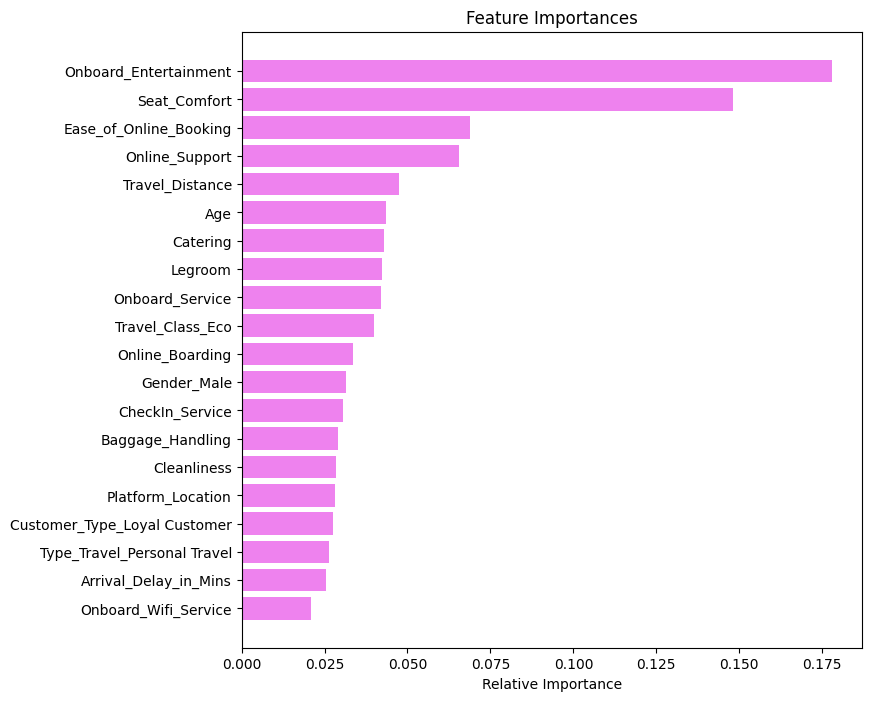

In [ ]:

# Get feature importances
importances = estimator.feature_importances_
features = X_train.columns  # Make sure this corresponds to your training data's column names

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#SVM .6

In [ ]:
svm_estimator = SVC(random_state = 1)
svm_estimator.fit(X_train, y_train)
y_pred_train_svm = svm_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_svm)

y_pred_test_svm = svm_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_svm)

## SVM Tuned

In [ ]:
# Define the SVM model
svm_estimator = SVC(random_state=1)

# Define the parameter grid for SVM
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_obj = GridSearchCV(svm_estimator, parameters, cv=5, scoring='f1', n_jobs=-1)
grid_obj.fit(X_train, y_train)

# Set the estimator to the best combination of parameters
best_svm_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
best_svm_estimator.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_svm = best_svm_estimator.predict(X_train)
y_pred_test_svm = best_svm_estimator.predict(X_test)

# Print the metrics for training and test sets
print("Training set metrics for SVM:")
metrics_score(y_train, y_pred_train_svm)
print("\nTest set metrics for SVM:")
metrics_score(y_test, y_pred_test_svm)

KeyboardInterrupt: 

#XGBoost .95

In [ ]:
# XGBoost Regressor
xgb = XGBRegressor(objective='binary:logistic',random_state = 42)

# Fitting the model
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

              precision    recall  f1-score   support

           0    0.95994   0.97290   0.96638     38526
           1    0.97725   0.96630   0.97175     46415

    accuracy                        0.96930     84941
   macro avg    0.96860   0.96960   0.96906     84941
weighted avg    0.96940   0.96930   0.96931     84941



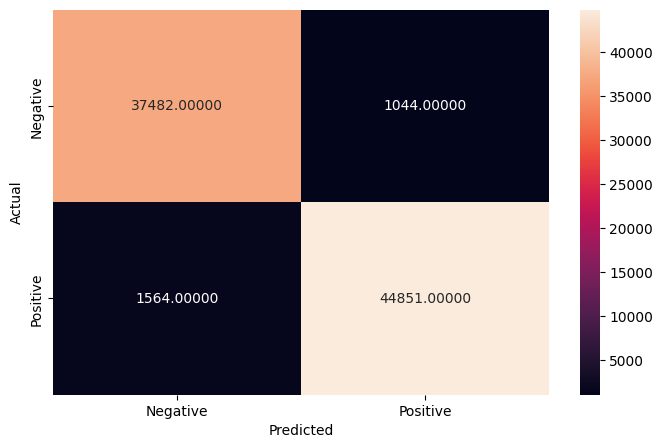

              precision    recall  f1-score   support

           0    0.94361   0.95845   0.95097      4260
           1    0.96537   0.95288   0.95908      5178

    accuracy                        0.95539      9438
   macro avg    0.95449   0.95566   0.95503      9438
weighted avg    0.95555   0.95539   0.95542      9438



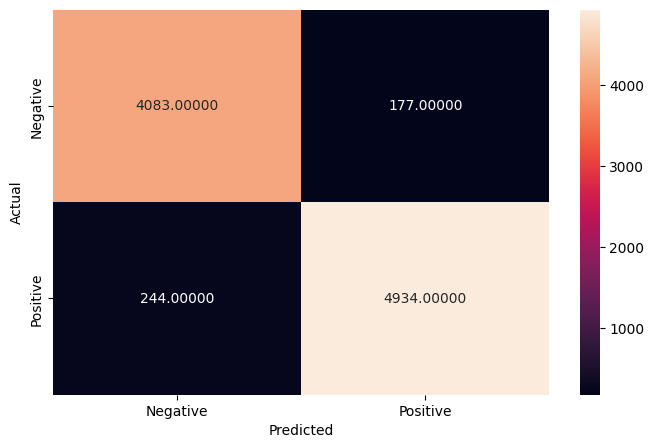

In [ ]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_train_xgb= np.where(y_pred_train_xgb >= 0.5, 1, 0)
metrics_score(y_train, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(X_test)
y_pred_test_xgb= np.where(y_pred_test_xgb >= 0.5, 1, 0)
metrics_score(y_test, y_pred_test_xgb)

In [ ]:
#fitting to test set
xgb_preds = xgb.predict(testset)
xgb_preds1= np.where(xgb_preds >= 0.5, 1, 0)
xgb_preds_df = pd.DataFrame(xgb_preds1, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
xgb_preds_df.reset_index(inplace=True)

# Rename the 'index' column to 'ID'
xgb_preds_df.rename(columns={'index': 'ID'}, inplace=True)

# Display the first few rows of rf_preds_df to verify
print(xgb_preds_df.head())

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/xgb_preds_untuned.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
xgb_preds_df.to_csv(file_path, index=False, header=True)

##XG Tuned .95 **BEST**


In [ ]:
# Define the classifier
num_negatives = sum(y_train == 0)
num_positives = sum(y_train == 1)
scale_pos_weight = num_negatives / num_positives
xgb = XGBRegressor(objective='binary:logistic', scale_pos_weight=scale_pos_weight, random_state=1)

# # Parameters grid for tuning
parameters = {
    'learning_rate': [0.1],
    'n_estimators': [140],
    'max_depth': [12],
    'subsample': [1],
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'reg_alpha': [0.1],
    'reg_lambda': [1],
    'booster': ['gbtree'],
    'tree_method': [ 'approx'],
    'num_parallel_tree': [4],
    #'min_child_weight': [1, 5, 10],
    'max_delta_step': [0, 1, 10]
}
# parameters = {
#     'learning_rate': [0.01, 0.1,  0.3],
#     'n_estimators': [140],
#     'max_depth': [10],
#     'subsample': [0.6, 0.8,1],
#     'colsample_bytree': [0.6, 0.8,1],
#     'gamma': [0, 0.1, 0.3],
#     'reg_alpha': [0, 0.1, 1, 10],
#     'reg_lambda': [0, 1, 10, 100],
#     'min_child_weight': [1, 5, 10],
#     'scale_pos_weight': [1, 10, 100],
#     'max_delta_step': [0, 1, 10],
#     'colsample_bylevel': [0.6, 0.8, 1.0],
#     'colsample_bynode': [0.6, 0.8, 1.0],
#     'booster': ['gbtree', 'dart'],
#     'tree_method': ['auto', 'exact', 'approx', 'hist']
#     'num_parallel_tree': [1, 2, 4],
#     'max_delta_step': [0, 1, 10],
# }

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters found:  {'booster': 'gbtree', 'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 12, 'n_estimators': 140, 'num_parallel_tree': 4, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1, 'tree_method': 'approx'}
Best cross-validation score:  0.863377821445465


              precision    recall  f1-score   support

           0    0.98659   0.99720   0.99187     38526
           1    0.99765   0.98875   0.99318     46415

    accuracy                        0.99258     84941
   macro avg    0.99212   0.99298   0.99253     84941
weighted avg    0.99264   0.99258   0.99259     84941



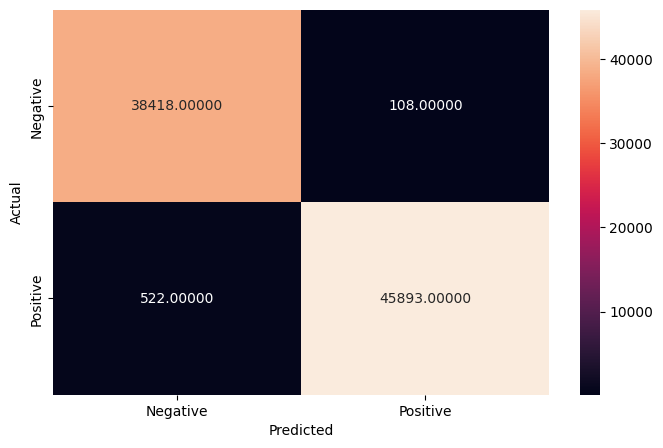

              precision    recall  f1-score   support

           0    0.93591   0.95986   0.94773      4260
           1    0.96627   0.94593   0.95599      5178

    accuracy                        0.95221      9438
   macro avg    0.95109   0.95289   0.95186      9438
weighted avg    0.95257   0.95221   0.95226      9438



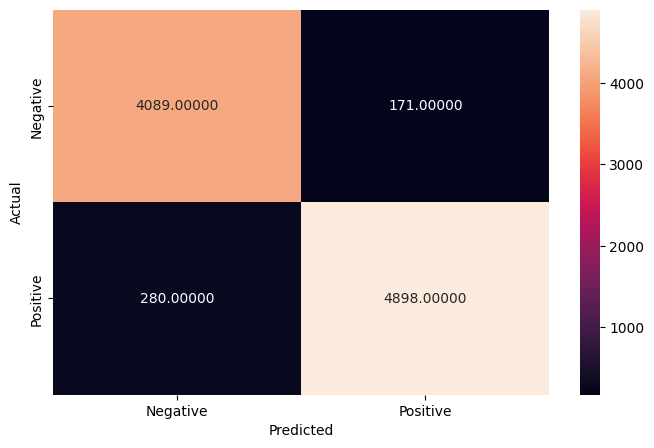

In [ ]:
y_pred_train_xgb = grid_search.predict(X_train)
y_pred_train_xgb= np.where(y_pred_train_xgb >= 0.5, 1, 0)
metrics_score(y_train, y_pred_train_xgb)

y_pred_test_xgb = grid_search.predict(X_test)
y_pred_test_xgb= np.where(y_pred_test_xgb >= 0.5, 1, 0)
metrics_score(y_test, y_pred_test_xgb)

In [ ]:
#fitting to test set
xgb_preds = grid_search.predict(testset)
xgb_preds1= np.where(xgb_preds >= 0.5, 1, 0)
xgb_preds_df = pd.DataFrame(xgb_preds1, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
xgb_preds_df.reset_index(inplace=True)

# Rename the 'index' column to 'ID'
xgb_preds_df.rename(columns={'index': 'ID'}, inplace=True)

# Display the first few rows of rf_preds_df to verify
print(xgb_preds_df.head())

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


In [ ]:
# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/xgb_preds3.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
xgb_preds_df.to_csv(file_path, index=False, header=True)

#KNN .91

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     29999
         1.0       0.95      0.93      0.94     36066

    accuracy                           0.94     66065
   macro avg       0.93      0.94      0.94     66065
weighted avg       0.94      0.94      0.94     66065



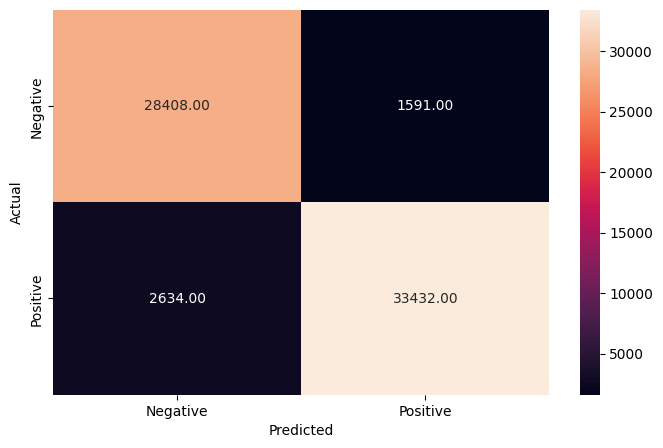

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     12787
         1.0       0.93      0.90      0.92     15527

    accuracy                           0.91     28314
   macro avg       0.91      0.91      0.91     28314
weighted avg       0.91      0.91      0.91     28314



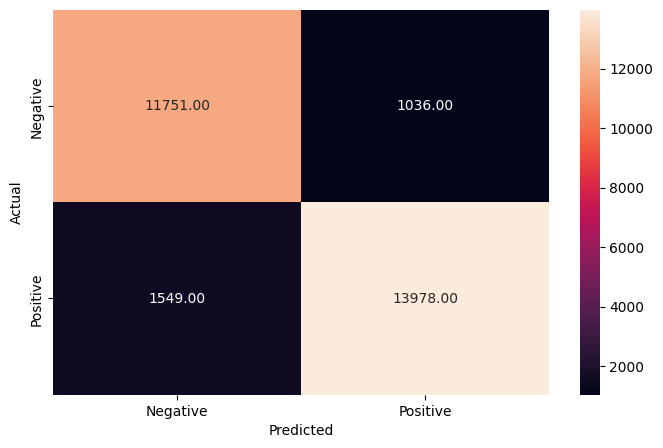

In [ ]:
# Decent performance for simple model not competitive with tree based models..

# Nearest Neighbor fit on PCA
# Splitting the data into train and test sets
# X = X_pca #using pca to fit
# Y = f_train.Overall_Experience
# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
# knn_model= KNeighborsClassifier()
# knn_model.fit(X_train,y_train)
# knn_train_predictions = knn_model.predict(X_train)
# metrics_score(y_train,knn_train_predictions)
# knn_test_predictions = knn_model.predict(X_test)
# metrics_score(y_test,knn_test_predictions)

##KNN Tuned .91

In [ ]:
# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'metric': ['euclidean']
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Set the KNN model to the best combination of parameters
# best_knn_model = grid_search.best_estimator_

# # Fit the best model to the training data
# best_knn_model.fit(X_train, y_train)

# # Predict on training and test sets
# knn_train_predictions = best_knn_model.predict(X_train)
# knn_test_predictions = best_knn_model.predict(X_test)

# # Print the metrics for training and test sets
# print("Training set metrics:")
# metrics_score(y_train, knn_train_predictions)
# print("\nTest set metrics:")
# metrics_score(y_test, knn_test_predictions)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# #reset train/test data
# cols = f_train.columns[f_train.dtypes == 'object']
# X = f_train.drop(['Overall_Experience', 'ID'], axis=1)
# X = pd.get_dummies(X, columns=cols, drop_first=True)
# Y = f_train.Overall_Experience
# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

#ANN

## Model .95

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Standardize the data
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ann_testset = scaler.transform(testset)

In [ ]:
# Define the ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',
                    kernel_regularizer=l2(0.001))) # L2 regularization
    model.add(Dropout(.3))
    model.add(Dense(128, input_dim=input_dim, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dense(64, input_dim=input_dim, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dense(16, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    optimizer = Adam(learning_rate=0.001)
    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
ann_model = create_ann_model(input_dim = X_train_scaled.shape[1])

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = ann_model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=200, batch_size=64, callbacks=[early_stopping])


Epoch 1/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 72s 15ms/step - accuracy: 0.8696 - loss: 0.8649 - val_accuracy: 0.9156 - val_loss: 0.3796
Epoch 2/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9143 - loss: 0.3531 - val_accuracy: 0.9284 - val_loss: 0.2550
Epoch 3/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9251 - loss: 0.2598 - val_accuracy: 0.9380 - val_loss: 0.2141
Epoch 4/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9335 - loss: 0.2217 - val_accuracy: 0.9393 - val_loss: 0.1992
Epoch 5/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9366 - loss: 0.2037 - val_accuracy: 0.9416 - val_loss: 0.1904
Epoch 6/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9388 - loss: 0.1941 - val_accuracy: 0.9396 - val_loss: 0.1902
Epoch 7/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9401 - loss: 0.1871 - val_accuracy: 0.9431 - val_loss: 0.1793
Epoch 8/200
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9412 - 

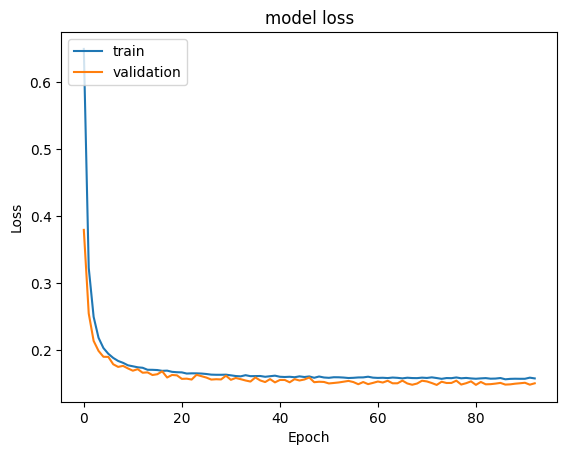

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best Threshold=0.515299, G-Mean=0.952


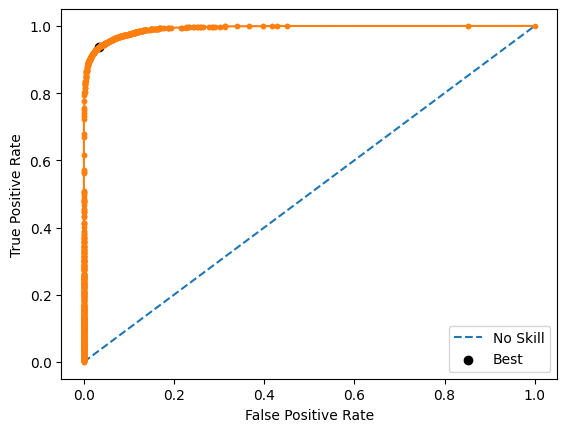

In [ ]:
# predict probabilities
yhat1 = ann_model.predict(X_test_scaled)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=ann_model.predict(X_test_scaled)
y_pred_e = (y_pred_e> thresholds1[ix])
y_pred_e

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0    0.92961   0.96408   0.94653      4260
           1    0.96952   0.93994   0.95450      5178

    accuracy                        0.95084      9438
   macro avg    0.94956   0.95201   0.95052      9438
weighted avg    0.95151   0.95084   0.95090      9438



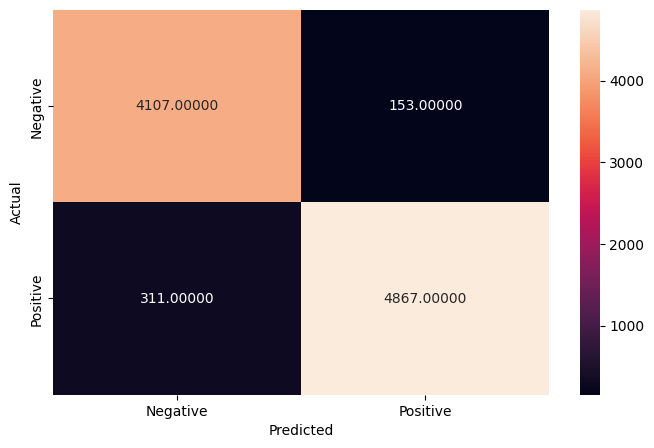

In [ ]:
# Predictions on the test set
y_test_pred_probs = ann_model.predict(X_test_scaled).ravel()
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

metrics_score(y_test,y_test_pred)


In [ ]:
ann_probs = ann_model.predict(ann_testset).ravel()
ann_preds= np.where(ann_probs >= 0.5, 1, 0)
ann_preds_df = pd.DataFrame(ann_preds, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
ann_preds_df.reset_index(inplace=True)

# Rename the 'index' column to 'ID'
ann_preds_df.rename(columns={'index': 'ID'}, inplace=True)

# Display the first few rows of rf_preds_df to verify
ann_preds_df.head(5)

array([0.9994471, 0.9895909, 0.9999707, ..., 0.4347607, 0.9981564,
       0.349184 ], dtype=float32)

In [ ]:
# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/ann_preds.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
ann_preds_df.to_csv(file_path, index=False, header=True)

##Model 1 .91

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
ann_testset = scaler.transform(testset)

In [ ]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model1.summary()
# Ensure X_train and y_train are numpy arrays and have appropriate data types
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Check for NaN or infinite values in X_train and y_train
assert not np.any(np.isnan(X_train)), "X_train contains NaN values"
assert not np.any(np.isinf(X_train)), "X_train contains infinite values"
assert not np.any(np.isnan(y_train)), "y_train contains NaN values"
assert not np.any(np.isinf(y_train)), "y_train contains infinite values"


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,409 (193.00 KB)

 Trainable params: 49,409 (193.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8837 - loss: 0.2699 - val_accuracy: 0.9299 - val_loss: 0.1717
Epoch 2/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9298 - loss: 0.1648 - val_accuracy: 0.9393 - val_loss: 0.1458
Epoch 3/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9405 - loss: 0.1368 - val_accuracy: 0.9416 - val_loss: 0.1435
Epoch 4/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9452 - loss: 0.1244 - val_accuracy: 0.9435 - val_loss: 0.1374
Epoch 5/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9484 - loss: 0.1159 - val_accuracy: 0.9464 - val_loss: 0.1362
Epoch 6/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9519 - loss: 0.1075 - val_accuracy: 0.9479 - val_loss: 0.1332
Epoch 7/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9540 - loss: 0.1048 - val_accuracy: 0.9473 - val_loss: 0.1382
Epoch 8/200
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9576 - loss: 

KeyboardInterrupt: 

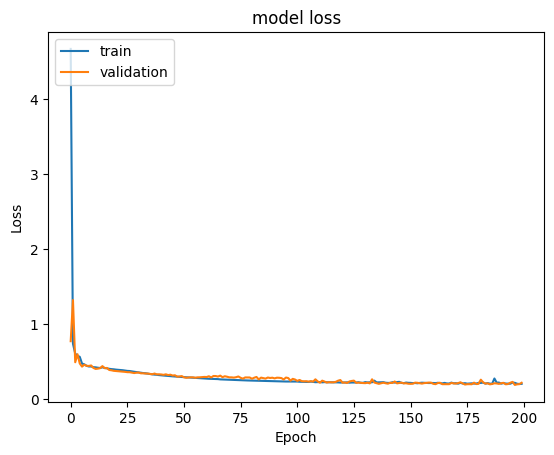

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best Threshold=0.450084, G-Mean=0.913


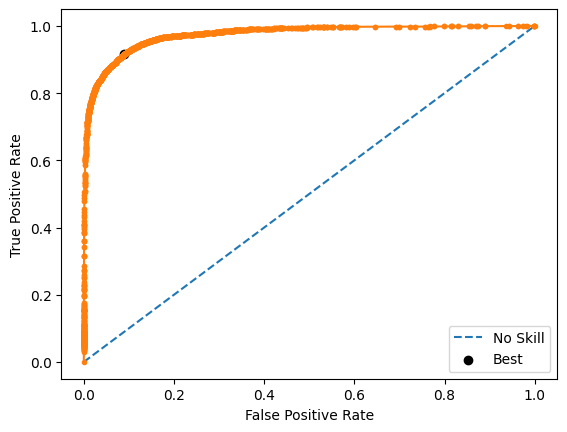

In [ ]:

# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8562
           1       0.93      0.92      0.92     10314

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876



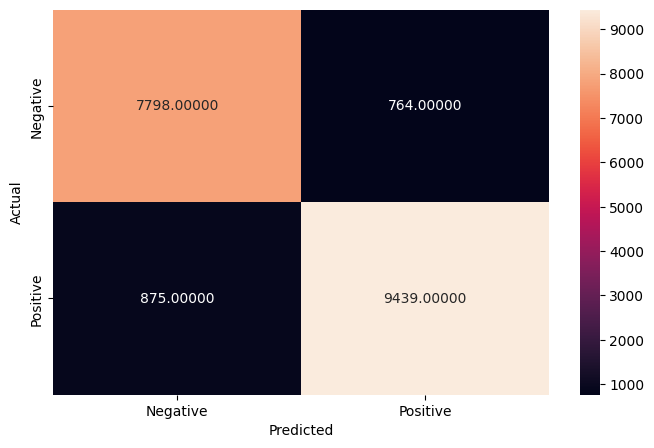

In [ ]:
#Calculating the confusion matrix
metrics_score(y_test,y_pred_e1)

##Model 2 .89

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7593 - loss: 0.4933 - val_accuracy: 0.6012 - val_loss: 1.5927
Epoch 2/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8486 - loss: 0.3440 - val_accuracy: 0.6962 - val_loss: 1.0433
Epoch 3/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8666 - loss: 0.3035 - val_accuracy: 0.7354 - val_loss: 0.6210
Epoch 4/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8720 - loss: 0.2973 - val_accuracy: 0.7991 - val_loss: 0.4245
Epoch 5/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8781 - loss: 0.2819 - val_accuracy: 0.6133 - val_loss: 1.8724
Epoch 6/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8799 - loss: 0.2770 - val_accuracy: 0.7489 - val_loss: 0.9437
Epoch 7/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8804 - loss: 0.2734 - val_accuracy: 0.5683 - val_loss: 2.8149
Epoch 8/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8849 - loss: 0.2655 - val_accuracy: 0.

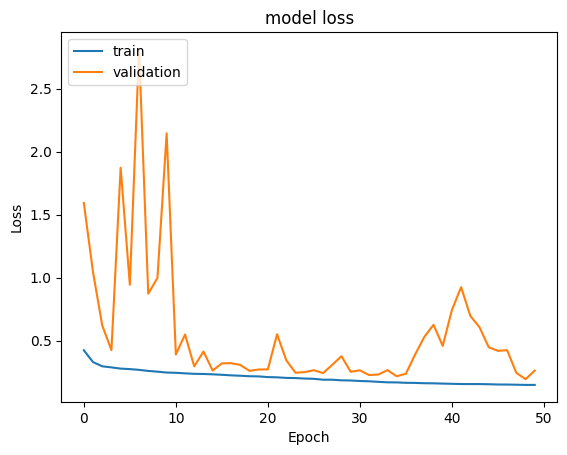

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold=0.662303, G-Mean=0.894


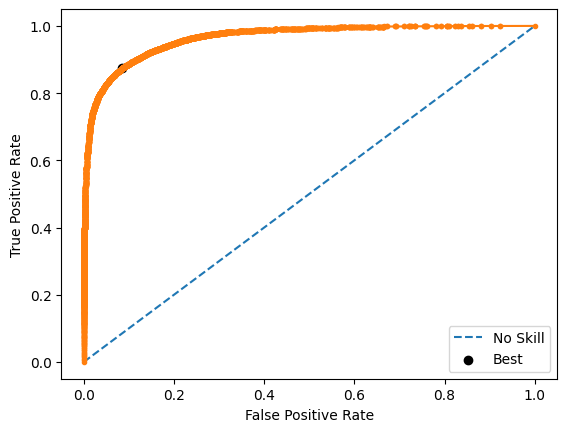

In [ ]:

# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     12787
         1.0       0.93      0.87      0.90     15527

    accuracy                           0.89     28314
   macro avg       0.89      0.89      0.89     28314
weighted avg       0.89      0.89      0.89     28314



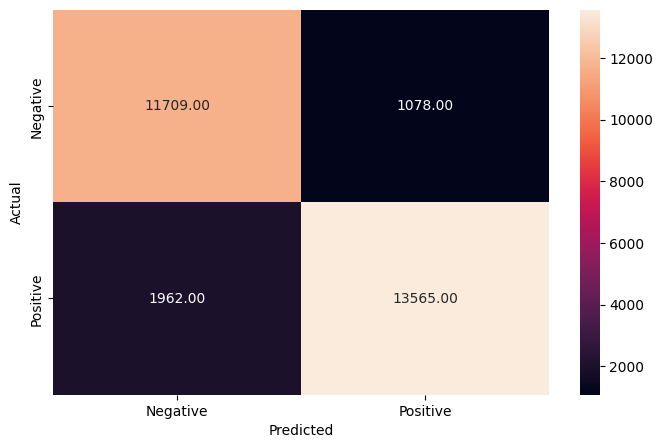

In [ ]:
#Calculating the confusion matrix
metrics_score(y_test,y_pred_e2)

##Model 3 .89

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,921 (195.00 KB)

 Trainable params: 49,921 (195.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5145 - loss: 4.8044 - val_accuracy: 0.5453 - val_loss: 0.6904
Epoch 2/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5369 - loss: 0.7064 - val_accuracy: 0.5435 - val_loss: 0.6880
Epoch 3/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5367 - loss: 0.6929 - val_accuracy: 0.4924 - val_loss: 0.6879
Epoch 4/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5431 - loss: 0.6905 - val_accuracy: 0.5453 - val_loss: 0.6805
Epoch 5/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5432 - loss: 0.6804 - val_accuracy: 0.5476 - val_loss: 0.6645
Epoch 6/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5484 - loss: 0.6691 - val_accuracy: 0.5641 - val_loss: 0.6489
Epoch 7/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5510 - loss: 0.6602 - val_accuracy: 0.5862 - val_loss: 0.6463
Epoch 8/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5856 - loss: 0.6453 - val_accuracy: 0.

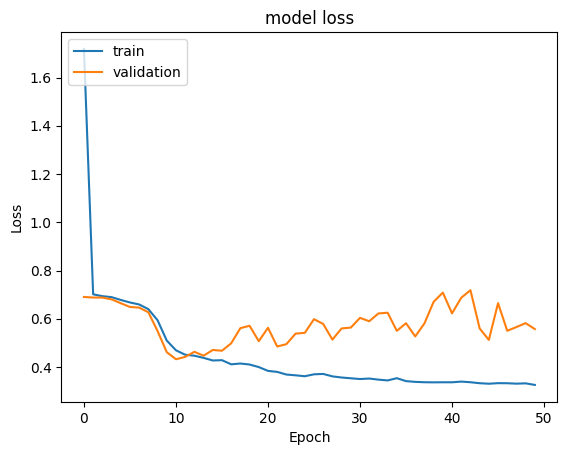

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Best Threshold=0.096974, G-Mean=0.887


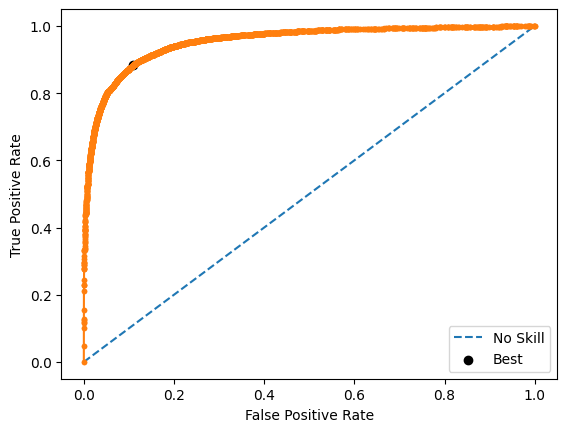

In [ ]:
# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     12787
         1.0       0.91      0.88      0.90     15527

    accuracy                           0.89     28314
   macro avg       0.89      0.89      0.89     28314
weighted avg       0.89      0.89      0.89     28314



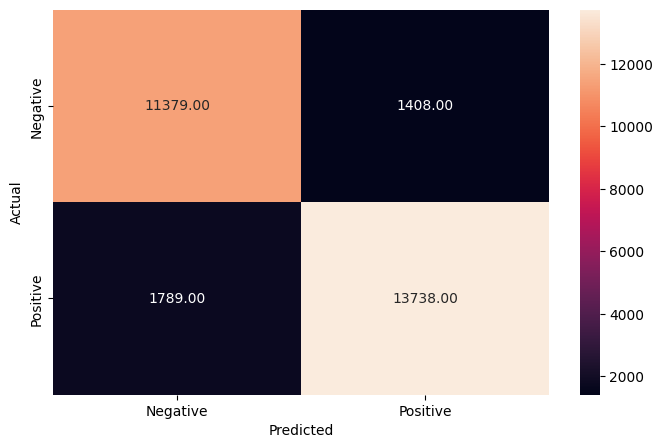

In [ ]:
#Calculating the confusion matrix
metrics_score(y_test,y_pred_e3)

## Model 4 .78

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    # model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    # model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, optimizer="Adam", verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_random = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
826/826 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5171 - loss: 7.8579 - val_accuracy: 0.5453 - val_loss: 0.6891
Best: 0.545917 using {'optimizer__learning_rate': 0.01, 'batch_size': 64}


In [ ]:
estimator_v4=create_model_v4()

estimator_v4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,921 (195.00 KB)

 Trainable params: 49,921 (195.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5177 - loss: 10.7873 - val_accuracy: 0.5453 - val_loss: 0.6893
Epoch 2/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5388 - loss: 0.7248 - val_accuracy: 0.5341 - val_loss: 0.6891
Epoch 3/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5432 - loss: 0.6997 - val_accuracy: 0.5453 - val_loss: 0.6890
Epoch 4/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5474 - loss: 0.6961 - val_accuracy: 0.5453 - val_loss: 0.6890
Epoch 5/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5466 - loss: 0.6911 - val_accuracy: 0.5453 - val_loss: 0.6889
Epoch 6/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5471 - loss: 0.6896 - val_accuracy: 0.5453 - val_loss: 0.6890
Epoch 7/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5475 - loss: 0.6886 - val_accuracy: 0.5453 - val_loss: 0.6889
Epoch 8/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5475 - loss: 0.6901 - val_accuracy: 0

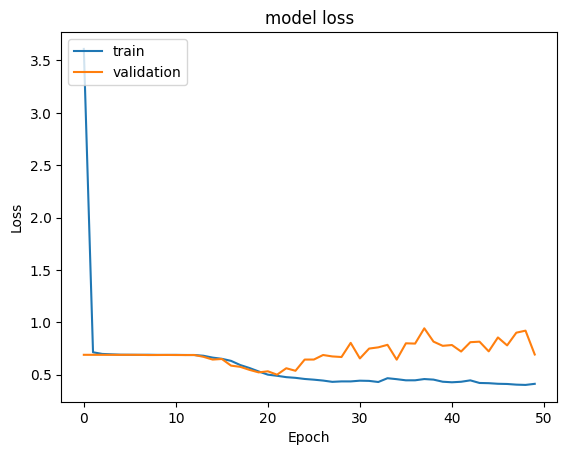

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold=0.158414, G-Mean=0.784


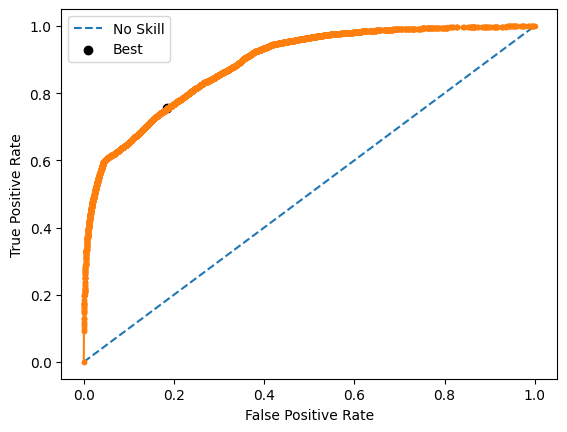

In [ ]:

# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77     12787
         1.0       0.83      0.75      0.79     15527

    accuracy                           0.78     28314
   macro avg       0.78      0.78      0.78     28314
weighted avg       0.79      0.78      0.78     28314



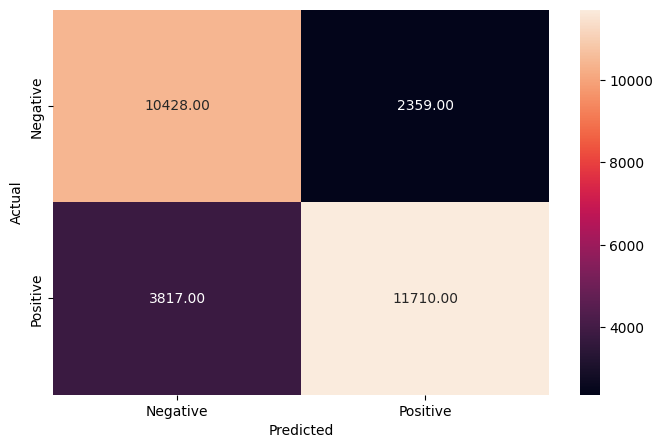

In [ ]:
#Calculating the confusion matrix
metrics_score(y_test,y_pred_e4)

## Dask

In [ ]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v6():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))


    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time

# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

1102/1102 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5629 - loss: 2.7069 - val_accuracy: 0.5345 - val_loss: 1.5565
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5550 - loss: 2.6337 - val_accuracy: 0.5494 - val_loss: 1.5087
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5425 - loss: 3.2575 - val_accuracy: 0.5548 - val_loss: 1.0468
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5611 - loss: 2.8128 - val_accuracy: 0.6524 - val_loss: 0.5876
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5564 - loss: 3.7729 - val_accuracy: 0.5174 - val_loss: 2.5739
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5616 - loss: 2.8315 - val_accuracy: 0.5626 - val_loss: 0.9008
689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 10s 

## Keras Tuner .91

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 02m 32s]
val_accuracy: 0.8127097090085348

Best val_accuracy So Far: 0.8322106997172037
Total elapsed time: 00h 12m 08s


In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8322106997172037

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8291077017784119

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 224
units_6: 96
units_7: 128
units_8: 96
units_9: 32
Score: 0.8127097090085348

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.7406342228253683

Trial 3 summary
Hyperparameters:
num_layers: 5
uni

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Hyperparameters:
# num_layers: 5
# units_0: 160
# units_1: 160
# learning_rate: 0.001
# units_2: 224
# units_3: 128
# units_4: 224
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          25,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │          36,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 224)                 │          28,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,905 (484.00 KB)

 Trainable params: 123,905 (484.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8602 - loss: 0.3325 - val_accuracy: 0.8803 - val_loss: 0.2828
Epoch 2/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8668 - loss: 0.3158 - val_accuracy: 0.8825 - val_loss: 0.2801
Epoch 3/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8641 - loss: 0.3199 - val_accuracy: 0.8814 - val_loss: 0.2761
Epoch 4/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8694 - loss: 0.3104 - val_accuracy: 0.8830 - val_loss: 0.2738
Epoch 5/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8719 - loss: 0.3044 - val_accuracy: 0.8784 - val_loss: 0.2867
Epoch 6/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8719 - loss: 0.3005 - val_accuracy: 0.8820 - val_loss: 0.2822
Epoch 7/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8735 - loss: 0.2997 - val_accuracy: 0.8850 - val_loss: 0.2699
Epoch 8/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8729 - loss: 0.2987 - val_accu

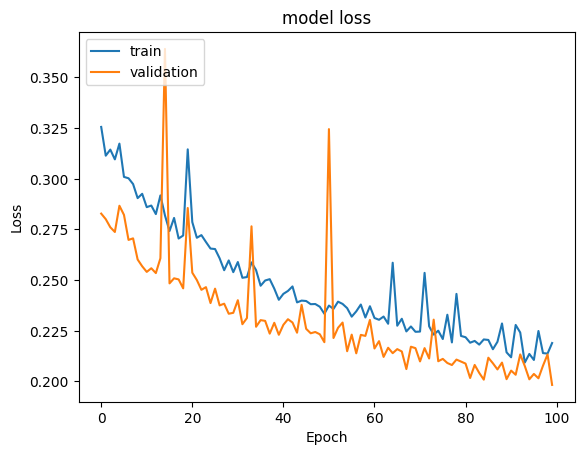

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Best Threshold=0.509406, G-Mean=0.913


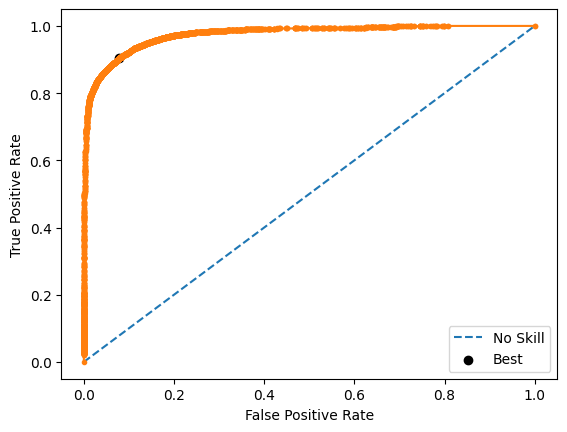

In [ ]:
# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     12787
         1.0       0.93      0.90      0.92     15527

    accuracy                           0.91     28314
   macro avg       0.91      0.91      0.91     28314
weighted avg       0.91      0.91      0.91     28314



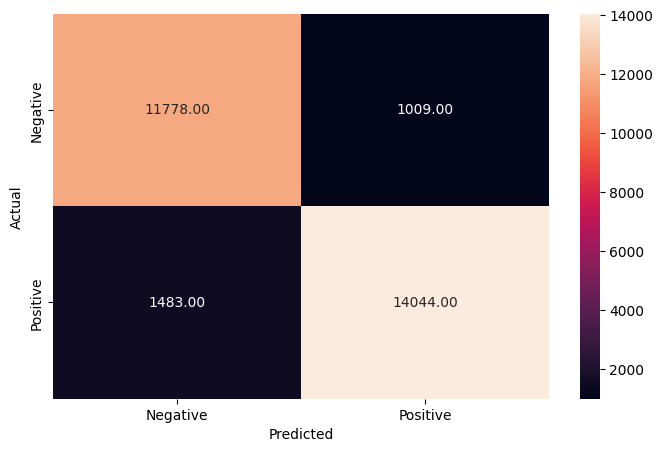

In [ ]:
#Calculating the confusion matrix
metrics_score(y_test,y_pred_e7)

# Multistep 1

### DataFrame Build

In [ ]:
#Traing DF Using probabilities from RF and XGB
rf_train_probs= estimator.predict_proba(X_train)
xgb_train_probs = grid_search.predict(X_train)
ann_train_probs = ann_model.predict(X_train_scaled)
rf_train_probs_df = pd.DataFrame(rf_train_probs[:, 1], index=X_train.index, columns=['Overall_Experience1'])
xgb_train_probs_df = pd.DataFrame(xgb_train_probs,index=X_train.index, columns= ['Overall_Experience2'])
ann_train_probs_df = pd.DataFrame(ann_train_probs,index=X_train.index, columns= ['Overall_Experience3'])
mixed_train_df = pd.concat([rf_train_probs_df,xgb_train_probs_df,ann_train_probs_df], axis = 1)
# mixed_train_df = pd.DataFrame(mixed_train_df,index=)
print(mixed_train_df)

#Test Set
rf_test_probs= estimator.predict_proba(X_test)
xgb_test_probs = grid_search.predict(X_test)
ann_test_probs = ann_model.predict(X_test_scaled)
rf_test_probs_df = pd.DataFrame(rf_test_probs[:, 1], index=X_test.index,columns=['Overall_Experience1'])
xgb_test_probs_df = pd.DataFrame(xgb_test_probs, index=X_test.index,columns= ['Overall_Experience2'])
ann_test_probs_df = pd.DataFrame(ann_test_probs, index=X_test.index,columns= ['Overall_Experience3'])
mixed_test_df = pd.concat([rf_test_probs_df,xgb_test_probs_df,ann_test_probs_df], axis = 1)
print(mixed_test_df)

#Prediciton Set
rf_probs= estimator.predict_proba(testset)
rf_probs_df = pd.DataFrame(rf_probs[:, 1], index=testset.index, columns=['Overall_Experience1'])
xgb_probs = pd.DataFrame(xgb_preds, index=testset.index, columns= ['Overall_Experience2'])
ann_probs1 = ann_model.predict(ann_testset).ravel()
ann_probs = pd.DataFrame(ann_probs1, index=testset.index, columns= ['Overall_Experience3'])
mixed_testset_df = pd.merge(rf_probs_df, xgb_probs,  on='ID')
mixed_testset_df = pd.merge(mixed_testset_df,ann_probs, on='ID')
mixed_testset_df


2655/2655 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
       Overall_Experience1  Overall_Experience2  Overall_Experience3
80780              0.99286              0.99968              0.99653
27101              0.00714              0.01021              0.00750
29452              0.00714              0.00039              0.00152
9518               0.00714              0.00082              0.00108
76399              0.99937              0.99132              0.96006
...                    ...                  ...                  ...
21440              0.99286              0.99921              0.99963
73349              1.00000              0.99965              0.99989
50057              1.00000              0.99931              0.99820
5192               1.00000              0.99977              0.99784
77708              0.00714              0.00327              0.01747

[84941 rows x 3 columns]
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
       Overall_Experience1  Overall_Experience2  Overall_Exper

,Overall_Experience1,Overall_Experience2,Overall_Experience3
ID,,,
99900001,0.97143,0.99896,0.99945
99900002,0.82143,0.99890,0.98959
99900003,1.00000,0.99989,0.99997
99900004,0.12857,0.00415,0.03612
99900005,1.00000,0.99977,0.99724
...,...,...,...
99935598,0.01429,0.00022,0.00101
99935599,1.00000,0.99988,0.99983
99935600,0.40714,0.52075,0.43476


In [ ]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(mixed_train_df, y_train)

# Make predictions on the training set
y_train_pred = logistic_model.predict(mixed_train_df)
y_train_proba = logistic_model.predict_proba(mixed_train_df)[:, 1]

# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_proba))
print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = logistic_model.predict(mixed_test_df)
y_test_proba = logistic_model.predict_proba(mixed_test_df)[:, 1]

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred, digits = 5))

# Get predicted probabilities for the testset
testset_proba = logistic_model.predict_proba(mixed_testset_df)[:, 1]
testset_pred= np.where(testset_proba >= 0.5, 1, 0)
# Convert probabilities to DataFrame with the index from testset
testset_pred_df = pd.DataFrame(testset_pred, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
testset_pred_df.reset_index(inplace=True)

# Display the first few rows of testset_proba_df to verify
print(testset_pred_df.head())

# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/mixed_preds.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
testset_pred_df.to_csv(file_path, index=False, header=True)

Training Accuracy: 0.9999411356117776
Training ROC AUC: 0.9999999944077352
Training F1 Score: 0.999946136361188
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38526
           1       1.00      1.00      1.00     46415

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941

Test Accuracy: 0.9527442254714982
Test ROC AUC: 0.9916214682196436
Test F1 Score: 0.9567745687148672
Test Classification Report:
               precision    recall  f1-score   support

           0    0.94369   0.95211   0.94789      4260
           1    0.96031   0.95326   0.95677      5178

    accuracy                        0.95274      9438
   macro avg    0.95200   0.95269   0.95233      9438
weighted avg    0.95281   0.95274   0.95276      9438

         ID  Overall_Experience
0  99900001                   1
1  9990

              precision    recall  f1-score   support

           0    1.00000   0.99995   0.99997     38526
           1    0.99996   1.00000   0.99998     46415

    accuracy                        0.99998     84941
   macro avg    0.99998   0.99997   0.99998     84941
weighted avg    0.99998   0.99998   0.99998     84941



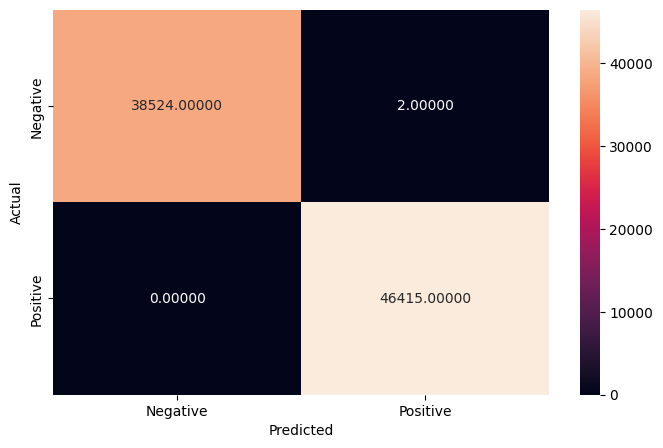

              precision    recall  f1-score   support

           0    0.93963   0.95000   0.94479      4260
           1    0.95849   0.94979   0.95412      5178

    accuracy                        0.94988      9438
   macro avg    0.94906   0.94989   0.94945      9438
weighted avg    0.94998   0.94988   0.94991      9438



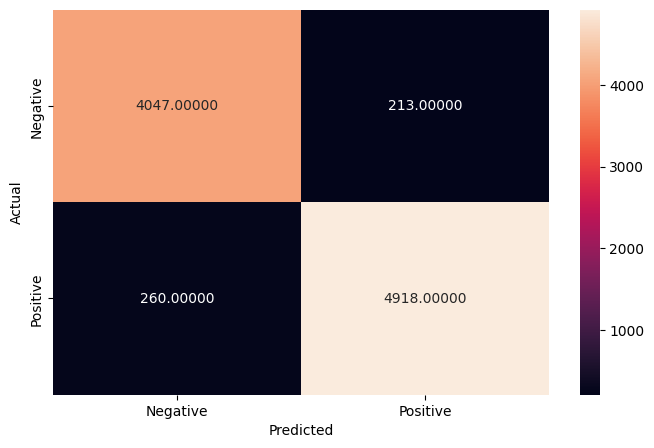

In [ ]:
svm_estimator = SVC(random_state = 1)
svm_estimator.fit(mixed_train_df, y_train)
y_pred_train_svm = svm_estimator.predict(mixed_train_df)
metrics_score(y_train, y_pred_train_svm)

y_pred_test_svm = svm_estimator.predict(mixed_test_df)
metrics_score(y_test, y_pred_test_svm)

In [ ]:
svm_estimator = SVC(random_state=1)

# Define the parameter grid for SVM
parameters = {
    'C': [0.1, .2],
    'kernel': ['rbf','sigmoid']
}

# Perform grid search with cross-validation
grid_obj = GridSearchCV(svm_estimator, parameters, cv=3, scoring='f1', n_jobs=-1)
grid_obj.fit(mixed_train_df, y_train)

# Set the estimator to the best combination of parameters
best_svm_estimator = grid_obj.best_estimator_

print(best_svm_estimator)

SVC(C=0.1, random_state=1)


Training set metrics for SVM:
              precision    recall  f1-score   support

           0    1.00000   0.99997   0.99999     38526
           1    0.99998   1.00000   0.99999     46415

    accuracy                        0.99999     84941
   macro avg    0.99999   0.99999   0.99999     84941
weighted avg    0.99999   0.99999   0.99999     84941



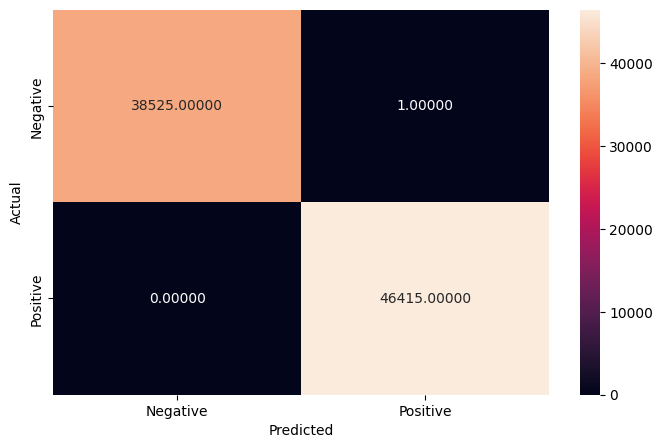


Test set metrics for SVM:
              precision    recall  f1-score   support

           0    0.94008   0.95023   0.94513      4260
           1    0.95869   0.95017   0.95441      5178

    accuracy                        0.95020      9438
   macro avg    0.94939   0.95020   0.94977      9438
weighted avg    0.95029   0.95020   0.95022      9438



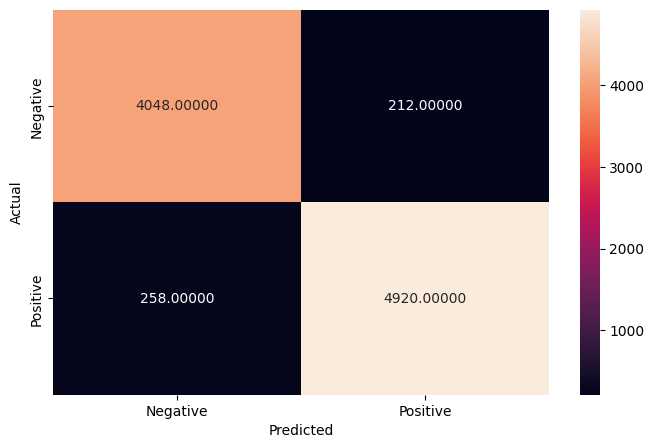

In [ ]:
# Fit the best algorithm to the data
best_svm_estimator.fit(mixed_train_df, y_train)

# Predict on training and test sets
y_pred_train_svm = best_svm_estimator.predict(mixed_train_df)
y_pred_test_svm = best_svm_estimator.predict(mixed_test_df)

# Print the metrics for training and test sets
print("Training set metrics for SVM:")
metrics_score(y_train, y_pred_train_svm)
print("\nTest set metrics for SVM:")
metrics_score(y_test, y_pred_test_svm)

In [ ]:
# Get predicted probabilities for the testset
testset_pred = best_svm_estimator.predict(mixed_testset_df)

# Convert probabilities to DataFrame with the index from testset
testset_pred_df = pd.DataFrame(testset_pred, index=testset.index, columns=['Overall_Experience'])

# Reset the index to make 'ID' a regular column instead of the index
testset_pred_df.reset_index(inplace=True)

# Display the first few rows of testset_proba_df to verify
print(testset_pred_df.head())

# Define the file path where you want to save the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Hackathon/mixed_preds.csv'  # Replace with your desired file path and name

# Save the DataFrame to a CSV file
testset_pred_df.to_csv(file_path, index=False, header=True)

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


# Other Ideas to Explore


In [ ]:
s_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Surveydata_train.csv')
s_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Surveydata_test.csv')
t_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Traveldata_train.csv')
t_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Traveldata_test.csv')
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/Sample_Submission.csv')
t_data_dict = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hackathon/Data_Dictionary.xlsx',header=1)
s_data_dict = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hackathon/Data_Dictionary.xlsx',sheet_name=1, header=1, nrows=18)
#merging into single data frame
f_train = pd.merge(left=s_train,right=t_train,on='ID')
f_test = pd.merge(left=s_test,right=t_test,on='ID')
#Printing number of missing by variable.
print(f'Number Missing by variable:\n{df.isnull().sum()}\n')
print(f'Percent Missing by variable:\n{df.isnull().sum()/df.shape[0]}\n')


Number Missing by variable:
ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

Percent Missing by variable:
ID                        0.000
Overall_Experience        0.000
Seat_Comfort              0.001
Seat_Class                0.000
A

In [ ]:
#mapping survery results to numerical values

# Define mapping of categories to numerical ratings
rating_mapping = {
    'Extremely Poor': 1,
    'Poor': 2,
    'Needs Improvement': 3,
    'Acceptable': 4,
    'Good': 5,
    'Excellent': 6
}

# Replace categorical values with numerical ratings
exclude_cols = ['ID', 'Overall_Experience', 'Seat_Class', 'Platform_Location']

# Select all columns except the excluded ones
rating_cols = [col for col in s_train.columns if col not in exclude_cols]

for col in rating_cols:
  f_train[col] = f_train[col].replace(rating_mapping)

# Define mapping of categories to numerical ratings
rating_mapping2 = {
    'Very Inconvenient': 1,
    'Inconvenient': 2,
    'Needs Improvement': 3,
    'Manageable': 4,
    'Convenient': 5,
    'Very Convenient': 6
}

f_train['Platform_Location'] = f_train['Platform_Location'].replace(rating_mapping2)

#applying to test data
for col in rating_cols:
  f_test[col] = f_test[col].replace(rating_mapping)

f_test['Platform_Location'] = f_test['Platform_Location'].replace(rating_mapping2)

f_train.describe().T
f_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.000,99917801.500,10277.556,99900001.000,99908901.250,99917801.500,99926701.750,99935602.000
Seat_Comfort,35580.000,3.837,1.393,1.000,3.000,4.000,5.000,6.000
Arrival_Time_Convenient,32277.000,3.987,1.524,1.000,3.000,4.000,5.000,6.000
Catering,32245.000,3.850,1.442,1.000,3.000,4.000,5.000,6.000
Platform_Location,35590.000,3.990,1.301,2.000,3.000,4.000,5.000,6.000
Onboard_Wifi_Service,35590.000,4.252,1.317,1.000,3.000,4.000,5.000,6.000
Onboard_Entertainment,35594.000,4.386,1.345,1.000,3.000,5.000,5.000,6.000
Online_Support,35576.000,4.521,1.302,2.000,4.000,5.000,6.000,6.000
Ease_of_Online_Booking,35584.000,4.477,1.306,1.000,3.000,5.000,6.000,6.000
Onboard_Service,32730.000,4.455,1.275,2.000,4.000,5.000,5.000,6.000


In [ ]:
# Columns to Impute
exclude = ["Overall_Experience","ID"]
in_col = [col for col in f_train.columns if col not in exclude]  # excluding ID columns from visuals
numerical_cols = f_train[in_col].select_dtypes(include=['int64', 'float64']).columns  # listing numerical colum

# Perform multiple imputation
imputer = IterativeImputer()
f_train[numerical_cols] = round(pd.DataFrame(imputer.fit_transform(f_train[numerical_cols]), columns=numerical_cols))

#Inputing 'Unknown' for remaining missing
f_train.fillna('Unknown', inplace=True)
f_train.isna().sum()

# Perform multiple imputation
imputer = IterativeImputer()
f_test[numerical_cols] = round(pd.DataFrame(imputer.fit_transform(f_test[numerical_cols]), columns=numerical_cols))

#Inputing 'Unknown' for remaining missing
f_test.fillna('Unknown', inplace=True)
f_test.isna().sum()

ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

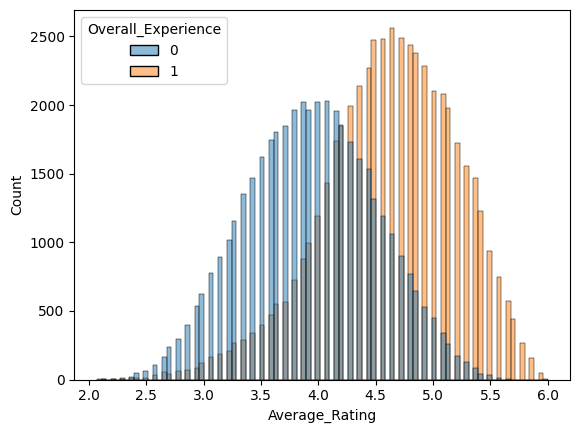

In [ ]:
#counts # of ratings below threshold per

cols = rating_cols+['Platform_Location']
f_train['Average_Rating']= f_train[cols].mean(axis=1)
sns.histplot(f_train, x='Average_Rating',  hue='Overall_Experience')
plt.show()

## ANN on Full Data Including Average Rating Model 6

In [ ]:
# Splitting the data into train and test sets
cols = f_train.columns[f_train.dtypes == 'object']
X = f_train.drop(['Overall_Experience', 'ID'], axis=1)
X = pd.get_dummies(X, columns=cols, drop_first=True)
# X = X_pca #using pca to fit (decreased performance)
Y = f_train.Overall_Experience
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
#applying to test data
testset = f_test.copy()
testset = pd.get_dummies(testset, columns=cols, drop_first=True)
testset.set_index('ID', inplace=True)

# Display the first few rows of the testset to verify
testset.head()

Shape of Training set :  (75503, 27)
Shape of test set :  (18876, 27)
Percentage of classes in training set:
Overall_Experience
1   0.547
0   0.453
Name: proportion, dtype: float64
Percentage of classes in test set:
Overall_Experience
1   0.546
0   0.454
Name: proportion, dtype: float64


,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Class_Ordinary,Gender_Male,Gender_Unknown,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
99900001,4.000,4.000,4.000,4.000,3.000,6.000,5.000,6.000,6.000,6.000,6.000,5.000,6.000,2.000,36.000,532.000,0.000,0.000,False,False,False,False,True,False,False,False
99900002,1.000,5.000,2.000,4.000,4.000,2.000,4.000,4.000,6.000,4.000,5.000,4.000,6.000,4.000,21.000,1425.000,9.000,28.000,True,False,False,False,False,False,False,False
99900003,6.000,6.000,6.000,6.000,6.000,6.000,6.000,3.000,3.000,3.000,3.000,5.000,3.000,6.000,60.000,2832.000,0.000,0.000,True,True,False,True,False,False,False,False
99900004,4.000,6.000,4.000,6.000,2.000,4.000,6.000,2.000,4.000,3.000,6.000,6.000,6.000,2.000,29.000,1352.000,0.000,0.000,False,False,False,True,False,True,False,True
99900005,6.000,1.000,6.000,3.000,6.000,6.000,6.000,6.000,5.000,4.000,6.000,6.000,6.000,6.000,18.000,1610.000,17.000,0.000,True,True,False,False,False,False,False,False


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define the model
model6 = Sequential()

# Adding the hidden and output layers with regularization
model6.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1],
                 kernel_regularizer=l2(0.001)))  # L2 regularization
model6.add(BatchNormalization())  # Batch Normalization

model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))  # L2 regularization
model6.add(BatchNormalization())  # Batch Normalization


model6.add(Dense(64, activation='relu', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))  # L2 regularization
model6.add(BatchNormalization())  # Batch Normalization


model6.add(Dense(32, activation='relu', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))  # L2 regularization
model6.add(BatchNormalization())  # Batch Normalization


model6.add(Dense(1, activation='sigmoid'))

# Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary to verify the architecture
model6.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 256)                 │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,353 (204.50 KB)

 Trainable params: 51,393 (200.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Ensure X_train and y_train are numpy arrays and have appropriate data types
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Check for NaN or infinite values in X_train and y_train
assert not np.any(np.isnan(X_train)), "X_train contains NaN values"
assert not np.any(np.isinf(X_train)), "X_train contains infinite values"
assert not np.any(np.isnan(y_train)), "y_train contains NaN values"
assert not np.any(np.isinf(y_train)), "y_train contains infinite values"


In [ ]:
history6 = model6.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7381 - loss: 1.0171 - val_accuracy: 0.6489 - val_loss: 1.3536
Epoch 2/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8156 - loss: 0.5466 - val_accuracy: 0.7948 - val_loss: 0.5540
Epoch 3/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8181 - loss: 0.4676 - val_accuracy: 0.7746 - val_loss: 0.5041
Epoch 4/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8223 - loss: 0.4391 - val_accuracy: 0.6393 - val_loss: 1.1947
Epoch 5/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8260 - loss: 0.4253 - val_accuracy: 0.5721 - val_loss: 1.7334
Epoch 6/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8349 - loss: 0.4088 - val_accuracy: 0.6215 - val_loss: 1.5431
Epoch 7/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8389 - loss: 0.3972 - val_accuracy: 0.5613 - val_loss: 2.9048
Epoch 8/100
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8390 - l

KeyboardInterrupt: 

## Dropping Bottom Features

In [ ]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Set a threshold (e.g., features contributing less than 0.01)
threshold = 0.01
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()

print(f'Features to drop: {features_to_drop}')


## Use Average Rating to build Models


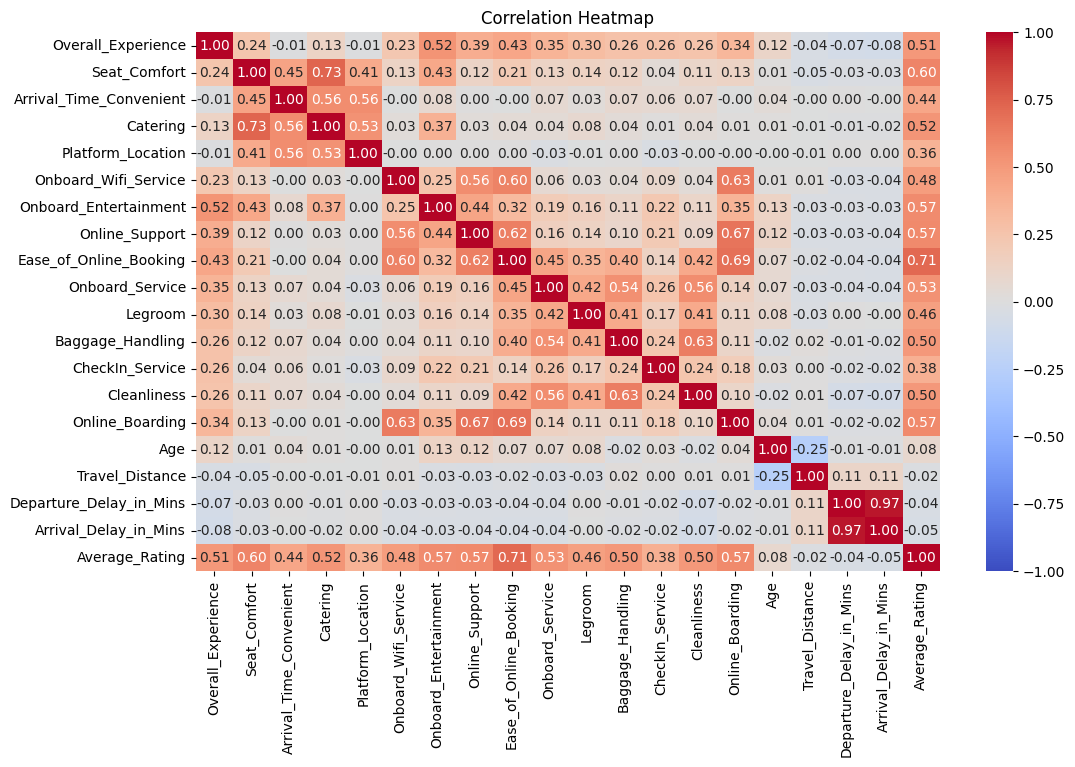

In [ ]:
# Select columns that are numerical and exclude 'ID'
cols = f_train.select_dtypes(include=['int64', 'float64']).columns
cols = [col for col in cols if col != 'ID']  # Exclude 'ID'

# Plot the correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(f_train[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

f_train.drop(columns = 'Departure_Delay_in_Mins', inplace=True)
f_test.drop(columns = 'Departure_Delay_in_Mins', inplace=True)  # Nearly Identical to Arrival Delay

In [ ]:
X = f_train.drop(['Overall_Experience','ID','Ease_of_Online_Booking'], axis=1)
y = f_train['Overall_Experience']

X_numeric = X.select_dtypes(include=[np.number])

# Handle missing values by filling with the mean of the column
X_numeric = X_numeric.fillna(X_numeric.mean())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif_data)

#Consider PCA

                    feature    VIF
0              Seat_Comfort 20.717
1   Arrival_Time_Convenient 14.333
2                  Catering 24.390
3         Platform_Location 16.576
4      Onboard_Wifi_Service 19.670
5     Onboard_Entertainment 20.606
6            Online_Support 28.184
7           Onboard_Service 24.032
8                   Legroom 17.327
9          Baggage_Handling 32.405
10          CheckIn_Service 14.351
11              Cleanliness 33.471
12          Online_Boarding 27.703
13                      Age  7.618
14          Travel_Distance  4.596
15    Arrival_Delay_in_Mins  1.175
